<a href="https://colab.research.google.com/github/nistrate/Statistics/blob/main/Math345_LAB_W7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🔬 Tutorial 7: The Art of Statistical Comparison - t-Tests! 🔬

## 🎯 Learning Objectives
By the end of this tutorial, you will be able to:
- 🔬 **Understand** when and why to use t-tests
- 🎪 **Distinguish** between independent and matched t-tests
- 🧮 **Calculate** t-statistics for different scenarios
- 📊 **Interpret** t-test results and p-values
- 🌍 **Apply** t-tests to real-world environmental data
- 🎨 **Visualize** differences between populations

## 🎪 Welcome to the Statistical Comparison Laboratory! 🔬

Imagine you're a **statistical scientist** investigating whether two populations are truly different! The **t-test** is your most powerful tool for comparing means when you don't know the population standard deviations.

### 🌟 Why t-Tests Matter:
- **🔬 Scientific Research**: Compare treatment vs control groups
- **🌍 Environmental Studies**: Analyze changes over time
- **🏥 Medical Research**: Test drug effectiveness
- **📊 Business Analytics**: Compare performance metrics
- **🎓 Education**: Evaluate teaching methods

### 🎯 The Two Types of t-Tests:

#### 🔬 **Independent t-Test (Aspin-Welch)**
- **Use when**: Comparing two separate groups
- **Example**: Test scores from two different schools
- **Formula**: 
$$\frac{(\bar{X}_{1} - \bar{X}_{2}) - (\mu_{1} - \mu_{2})}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}$$

#### 🎪 **Matched t-Test (Paired)**
- **Use when**: Comparing the same subjects under different conditions
- **Example**: Before/after measurements on the same people
- **Formula**: 
$$\frac{(\bar{X}_{1} - \bar{X}_{2}) - (\mu_{1} - \mu_{2})}{\text{standard error of difference}}$$

### 🎨 Key Assumptions:
- **📊 Sample Size**: 
  - Small samples (n < 30): Data should be approximately normal
  - Large samples (n ≥ 30): Distribution doesn't matter (Central Limit Theorem!)
- **🎯 Independence**: Observations should be independent
- **🧮 Equal Variances**: For independent t-tests (unless using Welch's correction)

### 🌟 Real-World Application:
We'll investigate **CO₂ emissions per capita** between 1950 and 2019 to see if there's been a significant change in global environmental impact!

## 🌍 The Environmental Investigation Challenge! 🌍

### 🎯 Your Mission as an Environmental Statistician:
You've been tasked with investigating whether global CO₂ emissions per capita have significantly changed between 1950 and 2019. This is a critical environmental analysis that could inform climate policy decisions!

### 🔬 Investigation Parameters:
- **📅 Years**: 1950 vs 2019 (nearly 70 years of environmental change!)
- **🌍 Data**: CO₂ emissions per capita by country
- **📊 Sample Size**: n = 75 countries per test
- **🎯 Significance Level**: α = 0.05 (5%)
- **🔬 Number of Tests**: 50 repetitions for statistical robustness

### 🎪 Your Investigation Tasks:

#### 🎯 **Task 1: Population Description**
- **📊 Analyze** both populations comprehensively
- **🎨 Create** beautiful histograms with proper labels
- **📈 Calculate** descriptive statistics (mean, median, std dev, etc.)
- **🔍 Identify** key differences between the two time periods

#### 🔬 **Task 2: Independent t-Test Analysis**
- **🧮 Perform** 50 independent t-tests
- **🎯 State** null and alternative hypotheses clearly
- **📊 Calculate** t-statistics and p-values
- **🚨 Analyze** Type I and Type II error risks
- **📈 Track** results across all 50 tests

#### 🎪 **Task 3: Matched t-Test Analysis**
- **🔬 Perform** 50 matched t-tests on the same countries
- **🎯 Compare** results with independent t-tests
- **📊 Analyze** which test is more appropriate
- **🌟 Interpret** the environmental implications

#### 🌟 **Task 4: Statistical Interpretation**
- **📝 Write** a comprehensive analysis (5-6 sentences)
- **🎯 Justify** which t-test is more appropriate
- **🌍 Provide** real-world examples for each test type
- **🚨 Discuss** error implications for environmental policy

### 🎨 Data Cleaning Requirements:
We'll exclude regional aggregations and focus on individual countries:
- Africa, Asia, EU-27, EU-28, Europe, North America, South America, World
- International transport data

### 🌍 Environmental Context:
- **1950**: Post-World War II, early industrialization
- **2019**: Modern era with climate awareness and technology
- **Hypothesis**: Emissions likely increased due to economic development

**🎪 Ready to investigate this environmental mystery? Let's begin! 🎪**




In [14]:
# 🌍 Let's Start Our Environmental Investigation! 🌍
print("🌍" + "="*70 + "🌍")
print("🌍 STARTING OUR ENVIRONMENTAL INVESTIGATION! 🌍")
print("🌍" + "="*70 + "🌍")
print("🔬 We're investigating CO₂ emissions changes over time!")
print("🎪 Get ready to solve this environmental mystery! 🎪")
print("🌍 Our mission: Compare emissions between 1950 and 2019! 🌍")

🌍======================================================================🌍
🌍 STARTING OUR ENVIRONMENTAL INVESTIGATION! 🌍
🌍======================================================================🌍
🔬 We're investigating CO₂ emissions changes over time!
🎪 Get ready to solve this environmental mystery! 🎪
🌍 Our mission: Compare emissions between 1950 and 2019! 🌍


In [15]:
# 🌟 Welcome to the Environmental Statistics Laboratory! Let's set up our tools! 🌟
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.integrate import quad 
from scipy.stats import norm, sem, t
import random
import warnings
warnings.filterwarnings('ignore')

# 🎨 Let's make our plots beautiful and environmentally conscious! ✨
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (18, 12)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3

# 🎯 Set up our environmental color palette
env_colors = ['#2E8B57', '#228B22', '#32CD32', '#90EE90', '#98FB98', '#F0E68C', '#FFD700', '#FFA500', '#FF6347', '#DC143C']

print("🌟 Welcome to the Environmental Statistics Laboratory! 🌟")
print("✨ All statistical tools loaded successfully! ✨")
print("🔬 Ready to investigate environmental changes! 🔬")
print("🌍 Let's analyze CO₂ emissions data! 🌍")

🌟 Welcome to the Environmental Statistics Laboratory! 🌟
✨ All statistical tools loaded successfully! ✨
🔬 Ready to investigate environmental changes! 🔬
🌍 Let's analyze CO₂ emissions data! 🌍


In [16]:
# 🌍 Loading Our Environmental Dataset! 🌍
print("🌍 Loading CO₂ emissions per capita data...")
print("🎪 This dataset contains environmental data from countries worldwide! 🎪")

# 📊 Load the dataset
df = pd.read_csv('./Datasets/co-emissions-per-capita.csv')

print("✅ Environmental dataset loaded successfully!")
print(f"📊 Dataset shape: {df.shape}")
print(f"🌍 Columns available: {list(df.columns)}")
print(f"📅 Years in dataset: {sorted(df['Year'].unique())}")
print(f"🏛️ Number of entities: {df['Entity'].nunique()}")

# 🎨 Let's take a peek at our environmental data
print("\n🎨 First few rows of our environmental dataset:")
display(df.head())

print("\n🎨 Dataset info:")
print(df.info())

print("\n🎨 Basic statistics:")
display(df.describe())

print("🌟 Our environmental dataset is ready for investigation! 🌟")

🌍 Loading CO₂ emissions per capita data...
🎪 This dataset contains environmental data from countries worldwide! 🎪
✅ Environmental dataset loaded successfully!
📊 Dataset shape: (22383, 4)
🌍 Columns available: ['Entity', 'Code', 'Year', 'Per capita CO2 emissions']
📅 Years in dataset: [np.int64(1750), np.int64(1800), np.int64(1801), np.int64(1802), np.int64(1803), np.int64(1804), np.int64(1805), np.int64(1806), np.int64(1807), np.int64(1808), np.int64(1809), np.int64(1810), np.int64(1811), np.int64(1812), np.int64(1813), np.int64(1814), np.int64(1815), np.int64(1816), np.int64(1817), np.int64(1818), np.int64(1819), np.int64(1820), np.int64(1821), np.int64(1822), np.int64(1823), np.int64(1824), np.int64(1825), np.int64(1826), np.int64(1827), np.int64(1828), np.int64(1829), np.int64(1830), np.int64(1831), np.int64(1832), np.int64(1833), np.int64(1834), np.int64(1835), np.int64(1836), np.int64(1837), np.int64(1838), np.int64(1839), np.int64(1840), np.int64(1841), np.int64(1842), np.int64(184

,Entity,Code,Year,Per capita CO2 emissions
0,Afghanistan,AFG,1949,0.001912
1,Afghanistan,AFG,1950,0.010871
2,Afghanistan,AFG,1951,0.011684
3,Afghanistan,AFG,1952,0.011542
4,Afghanistan,AFG,1953,0.013216



🎨 Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22383 entries, 0 to 22382
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Entity                    22383 non-null  object 
 1   Code                      20102 non-null  object 
 2   Year                      22383 non-null  int64  
 3   Per capita CO2 emissions  22383 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 699.6+ KB
None

🎨 Basic statistics:


,Year,Per capita CO2 emissions
count,22383.000000,22383.000000
mean,1955.976947,4.059491
std,48.520742,15.339886
min,1750.000000,-2.674945
25%,1928.000000,0.233867
50%,1967.000000,1.208742
75%,1994.000000,4.632373
max,2019.000000,794.334500


🌟 Our environmental dataset is ready for investigation! 🌟


In [17]:
# 🔍 Exploring Available Entities in Our Dataset! 🔍
print("🔍 Exploring available entities in our environmental dataset...")
print("🎪 Let's see what countries and regions we have! 🎪")

# 🎯 Get unique entities
unique_entities = df['Entity'].unique()
print(f"\n📊 Total unique entities: {len(unique_entities)}")

# 🎨 Display first 20 entities
print(f"\n🎨 First 20 entities:")
for i, entity in enumerate(unique_entities[:20], 1):
    print(f"   {i:2d}. {entity}")

# 🎯 Check for regional aggregations
regional_keywords = ['Africa', 'Asia', 'EU', 'Europe', 'North America', 'South America', 'World', 'International']
regional_entities = [entity for entity in unique_entities if any(keyword in entity for keyword in regional_keywords)]

print(f"\n🌍 Regional aggregations found: {len(regional_entities)}")
for entity in regional_entities:
    print(f"   - {entity}")

print(f"\n🎯 We'll filter out regional aggregations to focus on individual countries!")
print("🌟 This ensures our t-tests compare actual country data! 🌟")

🔍 Exploring available entities in our environmental dataset...
🎪 Let's see what countries and regions we have! 🎪

📊 Total unique entities: 221

🎨 First 20 entities:
    1. Afghanistan
    2. Africa
    3. Albania
    4. Algeria
    5. Andorra
    6. Angola
    7. Anguilla
    8. Antigua and Barbuda
    9. Argentina
   10. Armenia
   11. Aruba
   12. Asia
   13. Asia (excl. China & India)
   14. Australia
   15. Austria
   16. Azerbaijan
   17. Bahamas
   18. Bahrain
   19. Bangladesh
   20. Barbados

🌍 Regional aggregations found: 15
   - Africa
   - Asia
   - Asia (excl. China & India)
   - Central African Republic
   - EU-27
   - EU-28
   - Europe
   - Europe (excl. EU-27)
   - Europe (excl. EU-28)
   - International transport
   - North America
   - North America (excl. USA)
   - South Africa
   - South America
   - World

🎯 We'll filter out regional aggregations to focus on individual countries!
🌟 This ensures our t-tests compare actual country data! 🌟


In [18]:
# 🧹 Cleaning Our Dataset: Removing Regional Aggregations! 🧹
print("🧹 Cleaning our dataset to focus on individual countries...")
print("🎪 Removing regional aggregations for accurate country-level analysis! 🎪")

# 🎯 Define entities to drop (regional aggregations)
entities_to_drop = [
    'Africa', 'Asia', 'Asia (excl. China & India)', 'EU-27', 'EU-28', 
    'Europe Europe (excl. EU-27)', 'Europe (excl. EU-28)', 'International transport', 
    'North America', 'North America (excl. USA)', 'South America', 'World'
]

print(f"\n🗑️ Entities to remove ({len(entities_to_drop)}):")
for i, entity in enumerate(entities_to_drop, 1):
    print(f"   {i:2d}. {entity}")

# 🎯 Clean the dataset
my_df = df.copy()
original_count = len(my_df)

for entity in entities_to_drop:
    my_df = my_df[my_df.Entity != entity]

cleaned_count = len(my_df)
removed_count = original_count - cleaned_count

print(f"\n📊 Dataset cleaning results:")
print(f"   📈 Original records: {original_count:,}")
print(f"   🗑️ Records removed: {removed_count:,}")
print(f"   ✅ Remaining records: {cleaned_count:,}")
print(f"   🎯 Reduction: {(removed_count/original_count)*100:.1f}%")

# 🎯 Check remaining entities
remaining_entities = my_df['Entity'].nunique()
print(f"\n🌍 Remaining entities (countries): {remaining_entities}")

print("\n🌟 Dataset cleaning complete! Ready for country-level analysis! 🌟")


🧹 Cleaning our dataset to focus on individual countries...
🎪 Removing regional aggregations for accurate country-level analysis! 🎪

🗑️ Entities to remove (12):
    1. Africa
    2. Asia
    3. Asia (excl. China & India)
    4. EU-27
    5. EU-28
    6. Europe Europe (excl. EU-27)
    7. Europe (excl. EU-28)
    8. International transport
    9. North America
   10. North America (excl. USA)
   11. South America
   12. World

📊 Dataset cleaning results:
   📈 Original records: 22,383
   🗑️ Records removed: 1,804
   ✅ Remaining records: 20,579
   🎯 Reduction: 8.1%

🌍 Remaining entities (countries): 210

🌟 Dataset cleaning complete! Ready for country-level analysis! 🌟


In [19]:
# 🎯 Setting Up Our Environmental Investigation Parameters! 🎯
print("🎯 Setting up our environmental investigation parameters!")
print("🔬 We'll compare CO₂ emissions between two critical time periods! 🔬")

# 🎪 Investigation parameters
num_test = 50      # Number of test repetitions
n = 75            # Sample size per test
alpha = 0.05      # 5% significance level

# 🎯 Time periods for comparison
year1 = 1950      # Post-WWII era
year2 = 2019      # Modern era

print(f"\n📊 Investigation Setup:")
print(f"   📅 Year 1: {year1} (Post-WWII era)")
print(f"   📅 Year 2: {year2} (Modern era)")
print(f"   📊 Sample size: {n} countries per test")
print(f"   🎯 Significance level: {alpha:.1%}")
print(f"   🔬 Number of test repetitions: {num_test}")

# 🎯 Extract data for both years
df_1 = my_df[my_df.Year == year1].copy()
df_2 = my_df[my_df.Year == year2].copy()

print(f"\n📊 Data Availability:")
print(f"   🌍 Countries in {year1}: {len(df_1)}")
print(f"   🌍 Countries in {year2}: {len(df_2)}")
print(f"   🎯 Common countries: {len(set(df_1['Entity']) & set(df_2['Entity']))}")

# 🎯 Check data quality
print(f"\n🔍 Data Quality Check:")
print(f"   📊 {year1} - Missing values: {df_1['Per capita CO2 emissions'].isna().sum()}")
print(f"   📊 {year2} - Missing values: {df_2['Per capita CO2 emissions'].isna().sum()}")

# 🎯 Remove missing values
df_1_clean = df_1.dropna(subset=['Per capita CO2 emissions'])
df_2_clean = df_2.dropna(subset=['Per capita CO2 emissions'])

print(f"\n✅ Cleaned Data:")
print(f"   🌍 {year1} - Valid records: {len(df_1_clean)}")
print(f"   🌍 {year2} - Valid records: {len(df_2_clean)}")

print("🌟 Investigation parameters set successfully! 🌟")


🎯 Setting up our environmental investigation parameters!
🔬 We'll compare CO₂ emissions between two critical time periods! 🔬

📊 Investigation Setup:
   📅 Year 1: 1950 (Post-WWII era)
   📅 Year 2: 2019 (Modern era)
   📊 Sample size: 75 countries per test
   🎯 Significance level: 5.0%
   🔬 Number of test repetitions: 50

📊 Data Availability:
   🌍 Countries in 1950: 164
   🌍 Countries in 2019: 210
   🎯 Common countries: 164

🔍 Data Quality Check:
   📊 1950 - Missing values: 0
   📊 2019 - Missing values: 0

✅ Cleaned Data:
   🌍 1950 - Valid records: 164
   🌍 2019 - Valid records: 210
🌟 Investigation parameters set successfully! 🌟


🎯 Task 1: Comprehensive Population Description!
🔬 Let's analyze the CO₂ emissions distributions for both time periods! 🔬


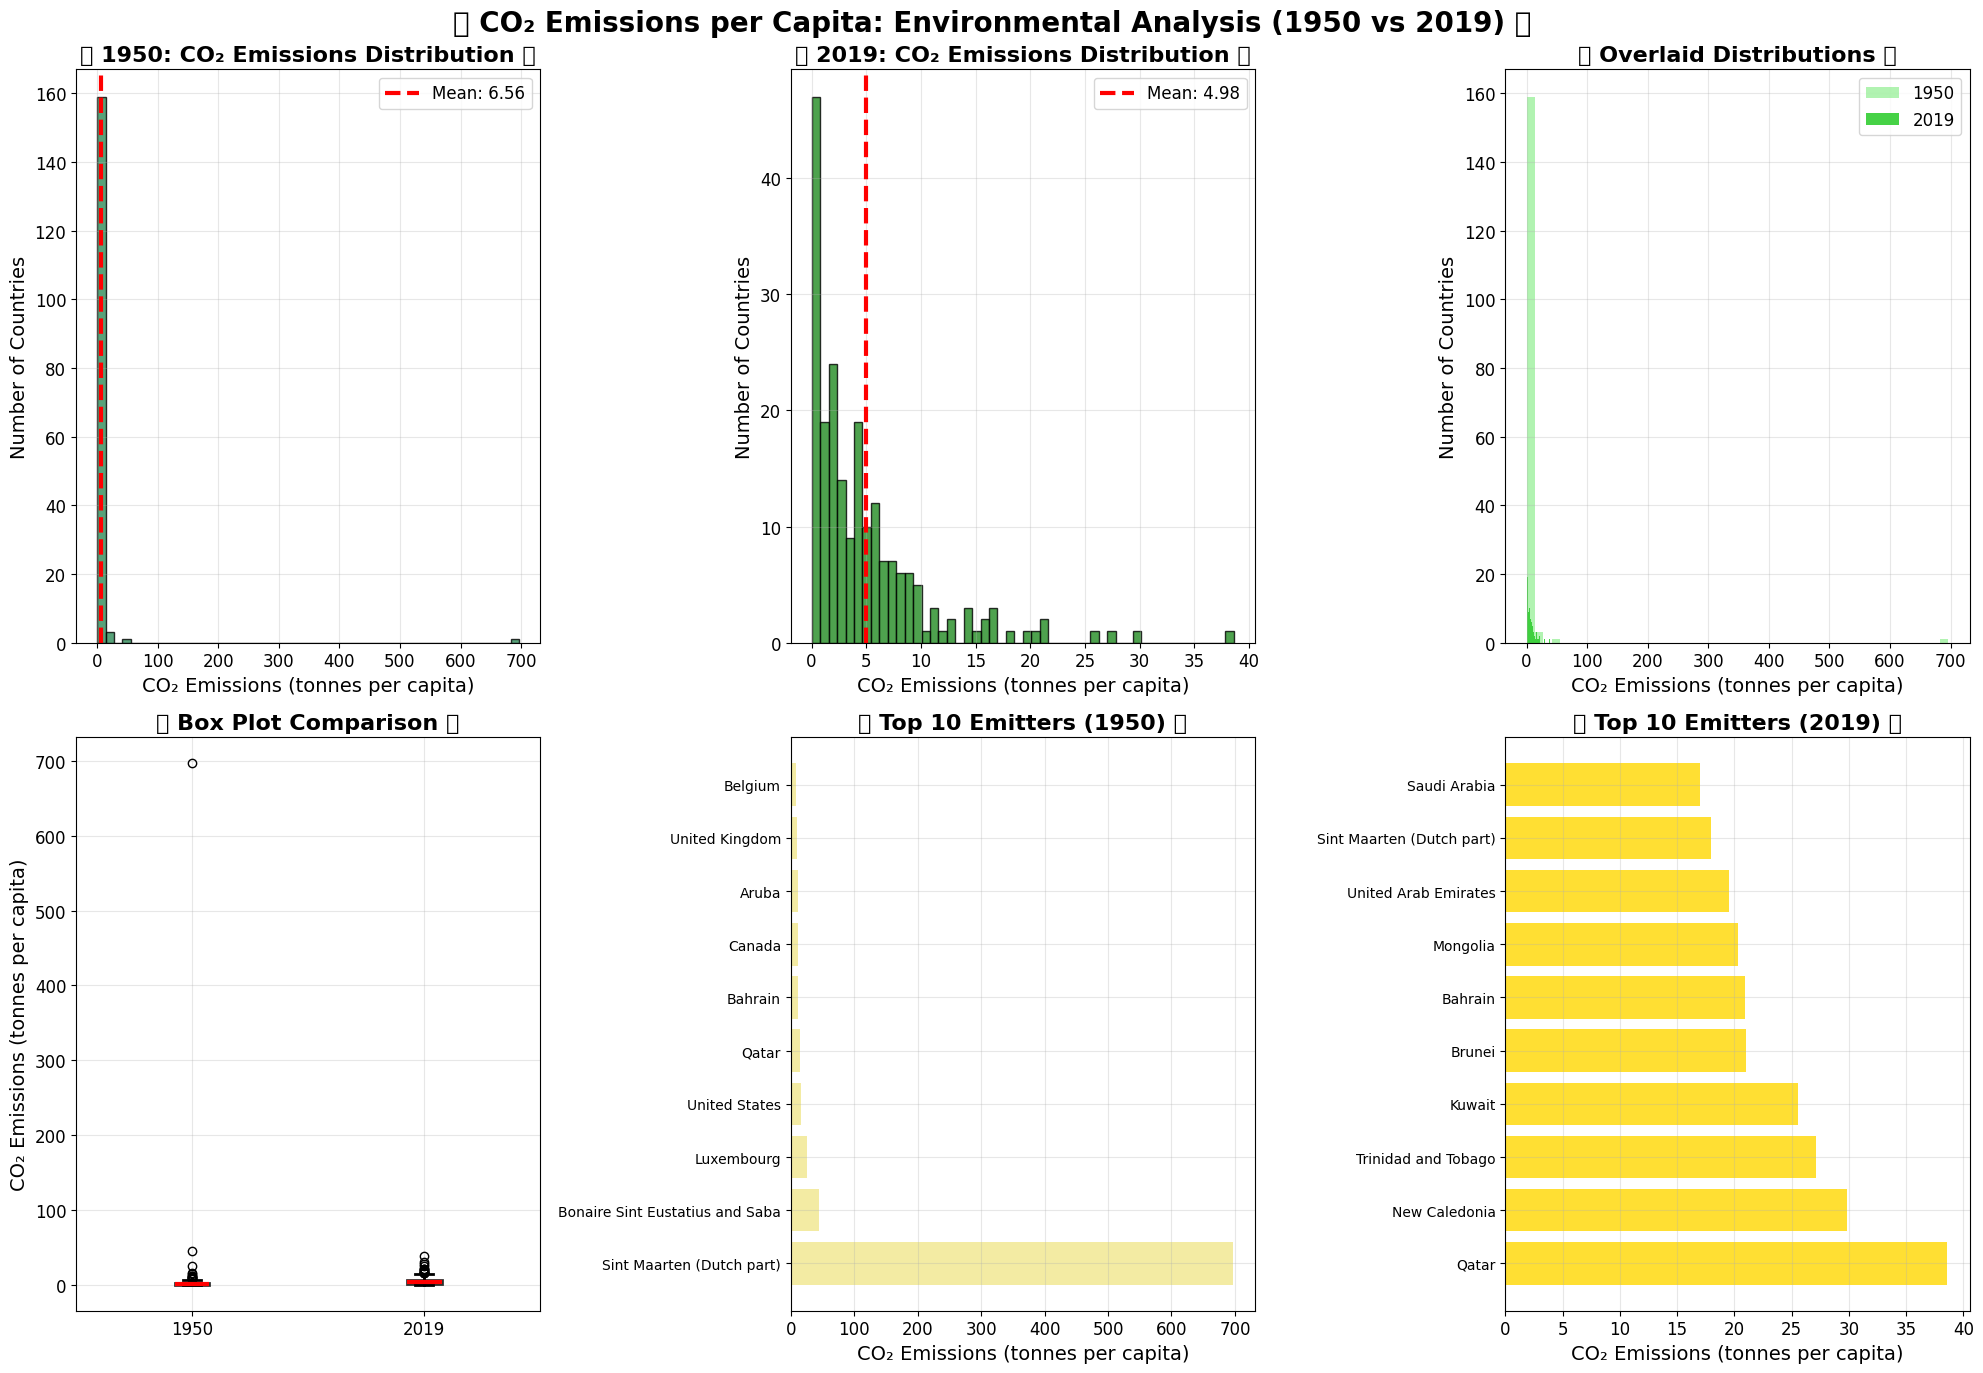


📊 Population 1 (1950) Statistical Description:
📈 Five-Number Summary:
   Min     : 0.00 tonnes per capita
   Q1      : 0.14 tonnes per capita
   Median  : 0.67 tonnes per capita
   Q3      : 2.81 tonnes per capita
   Max     : 696.61 tonnes per capita

📊 Central Tendency:
   Mean    : 6.56 tonnes per capita
   Median  : 0.67 tonnes per capita

📊 Variability:
   Std Dev : 54.25 tonnes per capita
   Variance: 2943.48
   Range   : 696.60 tonnes per capita
   IQR     : 2.67 tonnes per capita

📊 Distribution Shape:
   Skewness: 12.663
   Kurtosis: 161.488

📊 Population 2 (2019) Statistical Description:
📈 Five-Number Summary:
   Min     : 0.03 tonnes per capita
   Q1      : 0.98 tonnes per capita
   Median  : 3.18 tonnes per capita
   Q3      : 6.54 tonnes per capita
   Max     : 38.61 tonnes per capita

📊 Central Tendency:
   Mean    : 4.98 tonnes per capita
   Median  : 3.18 tonnes per capita

📊 Variability:
   Std Dev : 5.81 tonnes per capita
   Variance: 33.80
   Range   : 38.58 tonnes 

In [20]:
# 🎯 Task 1: Comprehensive Population Description! 🎯
print("🎯 Task 1: Comprehensive Population Description!")
print("🔬 Let's analyze the CO₂ emissions distributions for both time periods! 🔬")

# 🎨 Create comprehensive visualization
fig, axes = plt.subplots(2, 3, figsize=(20, 14))
fig.suptitle('🌍 CO₂ Emissions per Capita: Environmental Analysis (1950 vs 2019) 🌍', fontsize=20, fontweight='bold', y=0.98)

# 🎨 Plot 1: 1950 histogram
axes[0, 0].hist(df_1_clean['Per capita CO2 emissions'], bins=50, color=env_colors[0], alpha=0.8, edgecolor='black')
axes[0, 0].axvline(np.mean(df_1_clean['Per capita CO2 emissions']), color='red', linestyle='--', linewidth=3, 
                   label=f'Mean: {np.mean(df_1_clean["Per capita CO2 emissions"]):.2f}')
axes[0, 0].set_title(f'📊 {year1}: CO₂ Emissions Distribution 📊', fontsize=16, fontweight='bold')
axes[0, 0].set_xlabel('CO₂ Emissions (tonnes per capita)', fontsize=14)
axes[0, 0].set_ylabel('Number of Countries', fontsize=14)
axes[0, 0].legend(fontsize=12)
axes[0, 0].grid(True, alpha=0.3)

# 🎨 Plot 2: 2019 histogram
axes[0, 1].hist(df_2_clean['Per capita CO2 emissions'], bins=50, color=env_colors[1], alpha=0.8, edgecolor='black')
axes[0, 1].axvline(np.mean(df_2_clean['Per capita CO2 emissions']), color='red', linestyle='--', linewidth=3, 
                   label=f'Mean: {np.mean(df_2_clean["Per capita CO2 emissions"]):.2f}')
axes[0, 1].set_title(f'📊 {year2}: CO₂ Emissions Distribution 📊', fontsize=16, fontweight='bold')
axes[0, 1].set_xlabel('CO₂ Emissions (tonnes per capita)', fontsize=14)
axes[0, 1].set_ylabel('Number of Countries', fontsize=14)
axes[0, 1].legend(fontsize=12)
axes[0, 1].grid(True, alpha=0.3)

# 🎨 Plot 3: Overlaid histograms
axes[0, 2].hist(df_1_clean['Per capita CO2 emissions'], bins=50, alpha=0.7, color=env_colors[3], label=f'{year1}')
axes[0, 2].hist(df_2_clean['Per capita CO2 emissions'], bins=50, alpha=0.9, color=env_colors[2], label=f'{year2}')
axes[0, 2].set_title('🎪 Overlaid Distributions 🎪', fontsize=16, fontweight='bold')
axes[0, 2].set_xlabel('CO₂ Emissions (tonnes per capita)', fontsize=14)
axes[0, 2].set_ylabel('Number of Countries', fontsize=14)
axes[0, 2].legend(fontsize=12)
axes[0, 2].grid(True, alpha=0.3)

# 🎨 Plot 4: Box plots comparison
box_data = [df_1_clean['Per capita CO2 emissions'], df_2_clean['Per capita CO2 emissions']]
bp = axes[1, 0].boxplot(box_data, labels=[f'{year1}', f'{year2}'], patch_artist=True,
                       boxprops=dict(facecolor=env_colors[4], alpha=0.8, linewidth=2),
                       medianprops=dict(color='red', linewidth=3),
                       whiskerprops=dict(linewidth=2),
                       capprops=dict(linewidth=2))
axes[1, 0].set_title('📦 Box Plot Comparison 📦', fontsize=16, fontweight='bold')
axes[1, 0].set_ylabel('CO₂ Emissions (tonnes per capita)', fontsize=14)
axes[1, 0].grid(True, alpha=0.3)

# 🎨 Plot 5: Top 10 emitters comparison
top_10_1950 = df_1_clean.nlargest(10, 'Per capita CO2 emissions')
top_10_2019 = df_2_clean.nlargest(10, 'Per capita CO2 emissions')

y_pos = np.arange(len(top_10_1950))
axes[1, 1].barh(y_pos, top_10_1950['Per capita CO2 emissions'], color=env_colors[5], alpha=0.8, label=f'{year1}')
axes[1, 1].set_yticks(y_pos)
axes[1, 1].set_yticklabels(top_10_1950['Entity'], fontsize=10)
axes[1, 1].set_title(f'🏆 Top 10 Emitters ({year1}) 🏆', fontsize=16, fontweight='bold')
axes[1, 1].set_xlabel('CO₂ Emissions (tonnes per capita)', fontsize=14)
axes[1, 1].grid(True, alpha=0.3)

# 🎨 Plot 6: Top 10 emitters 2019
y_pos = np.arange(len(top_10_2019))
axes[1, 2].barh(y_pos, top_10_2019['Per capita CO2 emissions'], color=env_colors[6], alpha=0.8, label=f'{year2}')
axes[1, 2].set_yticks(y_pos)
axes[1, 2].set_yticklabels(top_10_2019['Entity'], fontsize=10)
axes[1, 2].set_title(f'🏆 Top 10 Emitters ({year2}) 🏆', fontsize=16, fontweight='bold')
axes[1, 2].set_xlabel('CO₂ Emissions (tonnes per capita)', fontsize=14)
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 🎯 Comprehensive statistical analysis
def comprehensive_stats(year, data, label):
    print(f"\n📊 {label} ({year}) Statistical Description:")
    print("="*60)
    
    # 📊 Basic statistics
    quartiles = np.percentile(data, [25, 50, 75])
    data_min, data_max = data.min(), data.max()
    
    print(f"📈 Five-Number Summary:")
    print(f"   Min     : {data_min:.2f} tonnes per capita")
    print(f"   Q1      : {quartiles[0]:.2f} tonnes per capita")
    print(f"   Median  : {quartiles[1]:.2f} tonnes per capita")
    print(f"   Q3      : {quartiles[2]:.2f} tonnes per capita")
    print(f"   Max     : {data_max:.2f} tonnes per capita")
    
    print(f"\n📊 Central Tendency:")
    print(f"   Mean    : {np.mean(data):.2f} tonnes per capita")
    print(f"   Median  : {np.median(data):.2f} tonnes per capita")
    
    print(f"\n📊 Variability:")
    print(f"   Std Dev : {np.std(data):.2f} tonnes per capita")
    print(f"   Variance: {np.var(data):.2f}")
    print(f"   Range   : {data_max - data_min:.2f} tonnes per capita")
    print(f"   IQR     : {quartiles[2] - quartiles[0]:.2f} tonnes per capita")
    
    print(f"\n📊 Distribution Shape:")
    print(f"   Skewness: {data.skew():.3f}")
    print(f"   Kurtosis: {data.kurtosis():.3f}")
    
    return None

# 🎯 Analyze both populations
comprehensive_stats(year1, df_1_clean['Per capita CO2 emissions'], "Population 1")
comprehensive_stats(year2, df_2_clean['Per capita CO2 emissions'], "Population 2")

# 🎯 Comparative analysis
print(f"\n🔍 Comparative Analysis:")
print("="*60)
mean_diff = np.mean(df_2_clean['Per capita CO2 emissions']) - np.mean(df_1_clean['Per capita CO2 emissions'])
std_diff = np.std(df_2_clean['Per capita CO2 emissions']) - np.std(df_1_clean['Per capita CO2 emissions'])

print(f"📈 Mean Difference: {mean_diff:.2f} tonnes per capita")
print(f"📊 Std Dev Difference: {std_diff:.2f} tonnes per capita")
print(f"🎯 Relative Change: {(mean_diff/np.mean(df_1_clean['Per capita CO2 emissions']))*100:.1f}%")

print("\n🌟 Population description complete! Ready for t-test analysis! 🌟")

In [21]:
# 🔬 Task 2: Independent t-Test Analysis! 🔬
print("🔬 Task 2: Independent t-Test Analysis!")
print("🎪 Let's perform 50 independent t-tests to investigate emissions differences! 🎪")

# 🎯 Import statistics module for standard deviation calculation
import statistics

# 🧮 Enhanced Independent t-Test Function
def hypothesis_simple_t_test(sample1, sample2, sample_size, alpha):
    """
    🎯 Enhanced Independent t-Test Function
    
    Parameters:
    -----------
    sample1, sample2 : array-like
        Sample data from two populations
    sample_size : int
        Size of each sample
    alpha : float
        Significance level
        
    Returns:
    --------
    bool : True if H0 not rejected, False if rejected
    """
    
    # 🎯 Calculate sample statistics
    x_bar_1 = np.mean(sample1)
    x_bar_2 = np.mean(sample2)
    s1 = statistics.stdev(sample1)
    s2 = statistics.stdev(sample2)
    
    # 🎯 State hypotheses clearly
    print(f"🔬 H₀: μ({year1}) = μ({year2}) (No difference in mean emissions)")
    print(f"🔬 Hₐ: μ({year1}) ≠ μ({year2}) (Significant difference in mean emissions)")
    
    # 🧮 Calculate t-statistic (Welch's t-test for unequal variances)
    se = np.sqrt((s1**2/sample_size) + (s2**2/sample_size))
    t_stat = (x_bar_1 - x_bar_2) / se
    
    # 🎯 Determine test direction and calculate p-value
    if t_stat >= 0:
        p_val = 2 * (1 - t.cdf(t_stat, sample_size - 1))  # Two-tailed test
    else:
        p_val = 2 * t.cdf(t_stat, sample_size - 1)
    
    # 🎪 Make decision and identify potential errors
    if p_val < alpha:
        print(f"🚨 DECISION: REJECT H₀ (p = {p_val:.4f} < α = {alpha})")
        print(f"🚨 POTENTIAL TYPE I ERROR: We conclude emissions changed when they didn't")
        print(f"📊 Sample 1 mean: {x_bar_1:.2f}, Sample 2 mean: {x_bar_2:.2f}")
        print(f"📊 t-statistic: {t_stat:.3f}, p-value: {p_val:.4f}")
        print("-" * 60)
        return False
    else:
        print(f"✅ DECISION: FAIL TO REJECT H₀ (p = {p_val:.4f} ≥ α = {alpha})")
        print(f"⚠️ POTENTIAL TYPE II ERROR: We conclude no change when emissions did change")
        print(f"📊 Sample 1 mean: {x_bar_1:.2f}, Sample 2 mean: {x_bar_2:.2f}")
        print(f"📊 t-statistic: {t_stat:.3f}, p-value: {p_val:.4f}")
        print("-" * 60)
        return True

print("🌟 Independent t-test function ready! 🌟")


🔬 Task 2: Independent t-Test Analysis!
🎪 Let's perform 50 independent t-tests to investigate emissions differences! 🎪
🌟 Independent t-test function ready! 🌟


In [22]:
# 🎪 Running 50 Independent t-Tests! 🎪
print("🎪 Running 50 Independent t-Tests...")
print("🔬 This will give us robust statistical evidence! 🔬")

# 🎯 Initialize results tracking
simple_t_test_results = []
t_statistics = []
p_values = []
sample_means_1 = []
sample_means_2 = []

print(f"\n🚀 Starting {num_test} independent t-tests...")
print("="*70)

# 🎪 Run the tests
for test_num in range(num_test):
    print(f"\n🔬 Test #{test_num + 1}/{num_test}")
    
    # 🎯 Random sampling from both populations
    sample_1 = random.sample(list(df_1_clean['Per capita CO2 emissions']), n)
    sample_2 = random.sample(list(df_2_clean['Per capita CO2 emissions']), n)
    
    # 🧮 Perform the test
    result = hypothesis_simple_t_test(sample_1, sample_2, n, alpha)
    simple_t_test_results.append(result)
    
    # 📊 Store statistics for analysis
    x_bar_1 = np.mean(sample_1)
    x_bar_2 = np.mean(sample_2)
    s1 = statistics.stdev(sample_1)
    s2 = statistics.stdev(sample_2)
    
    se = np.sqrt((s1**2/n) + (s2**2/n))
    t_stat = (x_bar_1 - x_bar_2) / se
    
    if t_stat >= 0:
        p_val = 2 * (1 - t.cdf(t_stat, n - 1))
    else:
        p_val = 2 * t.cdf(t_stat, n - 1)
    
    t_statistics.append(t_stat)
    p_values.append(p_val)
    sample_means_1.append(x_bar_1)
    sample_means_2.append(x_bar_2)

print("\n🌟 All 50 independent t-tests completed! 🌟")

🎪 Running 50 Independent t-Tests...
🔬 This will give us robust statistical evidence! 🔬

🚀 Starting 50 independent t-tests...

🔬 Test #1/50
🔬 H₀: μ(1950) = μ(2019) (No difference in mean emissions)
🔬 Hₐ: μ(1950) ≠ μ(2019) (Significant difference in mean emissions)
🚨 DECISION: REJECT H₀ (p = 0.0131 < α = 0.05)
🚨 POTENTIAL TYPE I ERROR: We conclude emissions changed when they didn't
📊 Sample 1 mean: 2.14, Sample 2 mean: 3.67
📊 t-statistic: -2.543, p-value: 0.0131
------------------------------------------------------------

🔬 Test #2/50
🔬 H₀: μ(1950) = μ(2019) (No difference in mean emissions)
🔬 Hₐ: μ(1950) ≠ μ(2019) (Significant difference in mean emissions)
🚨 DECISION: REJECT H₀ (p = 0.0341 < α = 0.05)
🚨 POTENTIAL TYPE I ERROR: We conclude emissions changed when they didn't
📊 Sample 1 mean: 2.73, Sample 2 mean: 4.74
📊 t-statistic: -2.159, p-value: 0.0341
------------------------------------------------------------

🔬 Test #3/50
🔬 H₀: μ(1950) = μ(2019) (No difference in mean emissions)
🔬

🎨 Creating comprehensive visualization of our t-test results...
📊 Let's analyze the patterns in our statistical tests! 📊


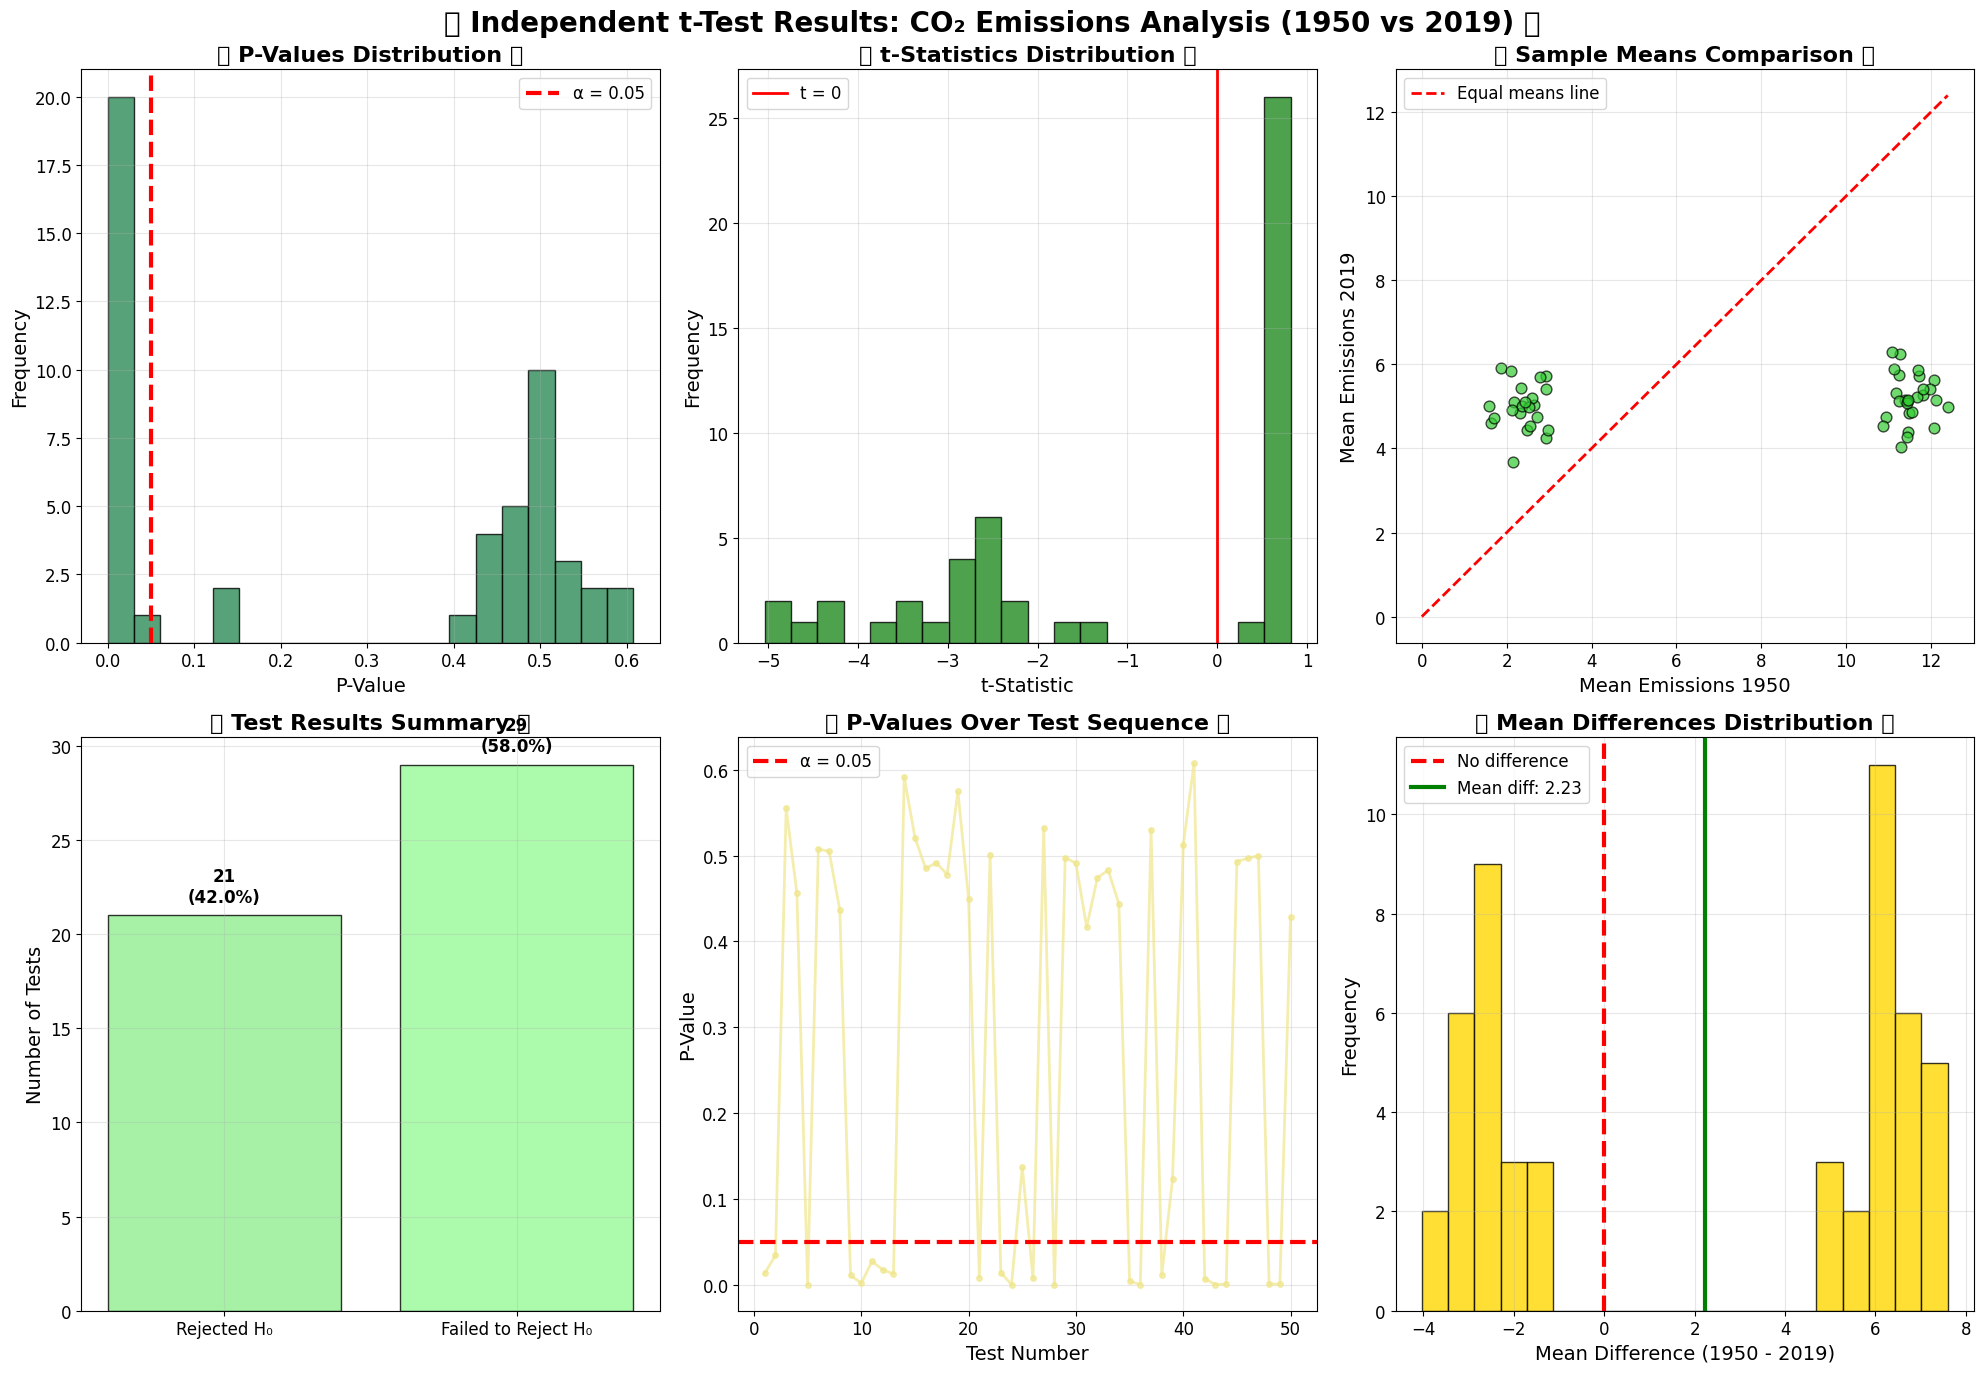


🎯 Independent t-Test Results Summary:
📊 Total tests performed: 50
🚨 H₀ rejected: 21 times (42.0%)
✅ H₀ not rejected: 29 times (58.0%)
📈 Average p-value: 0.2778
📊 Average t-statistic: -1.046
🎯 Average mean difference: 2.230

🌟 Independent t-test analysis complete! 🌟


In [23]:
# 🎨 Visualizing Independent t-Test Results! 🎨
print("🎨 Creating comprehensive visualization of our t-test results...")
print("📊 Let's analyze the patterns in our statistical tests! 📊")

# 🎨 Create comprehensive results visualization
fig, axes = plt.subplots(2, 3, figsize=(20, 14))
fig.suptitle('🔬 Independent t-Test Results: CO₂ Emissions Analysis (1950 vs 2019) 🔬', fontsize=20, fontweight='bold', y=0.98)

# 🎨 Plot 1: P-values distribution
axes[0, 0].hist(p_values, bins=20, color=env_colors[0], alpha=0.8, edgecolor='black')
axes[0, 0].axvline(alpha, color='red', linestyle='--', linewidth=3, label=f'α = {alpha}')
axes[0, 0].set_title('📊 P-Values Distribution 📊', fontsize=16, fontweight='bold')
axes[0, 0].set_xlabel('P-Value', fontsize=14)
axes[0, 0].set_ylabel('Frequency', fontsize=14)
axes[0, 0].legend(fontsize=12)
axes[0, 0].grid(True, alpha=0.3)

# 🎨 Plot 2: t-statistics distribution
axes[0, 1].hist(t_statistics, bins=20, color=env_colors[1], alpha=0.8, edgecolor='black')
axes[0, 1].axvline(0, color='red', linestyle='-', linewidth=2, label='t = 0')
axes[0, 1].set_title('📈 t-Statistics Distribution 📈', fontsize=16, fontweight='bold')
axes[0, 1].set_xlabel('t-Statistic', fontsize=14)
axes[0, 1].set_ylabel('Frequency', fontsize=14)
axes[0, 1].legend(fontsize=12)
axes[0, 1].grid(True, alpha=0.3)

# 🎨 Plot 3: Sample means comparison
axes[0, 2].scatter(sample_means_1, sample_means_2, color=env_colors[2], alpha=0.7, s=60, edgecolor='black')
axes[0, 2].plot([0, max(max(sample_means_1), max(sample_means_2))], [0, max(max(sample_means_1), max(sample_means_2))], 
                'r--', linewidth=2, label='Equal means line')
axes[0, 2].set_title('🎯 Sample Means Comparison 🎯', fontsize=16, fontweight='bold')
axes[0, 2].set_xlabel(f'Mean Emissions {year1}', fontsize=14)
axes[0, 2].set_ylabel(f'Mean Emissions {year2}', fontsize=14)
axes[0, 2].legend(fontsize=12)
axes[0, 2].grid(True, alpha=0.3)

# 🎨 Plot 4: Test results summary
rejected_count = sum([1 for result in simple_t_test_results if not result])
not_rejected_count = sum([1 for result in simple_t_test_results if result])

categories = ['Rejected H₀', 'Failed to Reject H₀']
counts = [rejected_count, not_rejected_count]
colors = [env_colors[3], env_colors[4]]

bars = axes[1, 0].bar(categories, counts, color=colors, alpha=0.8, edgecolor='black')
axes[1, 0].set_title('📊 Test Results Summary 📊', fontsize=16, fontweight='bold')
axes[1, 0].set_ylabel('Number of Tests', fontsize=14)
axes[1, 0].grid(True, alpha=0.3)

# 🎯 Add value labels on bars
for bar, count in zip(bars, counts):
    height = bar.get_height()
    axes[1, 0].text(bar.get_x() + bar.get_width()/2., height + 0.5,
                   f'{count}\n({count/num_test*100:.1f}%)', ha='center', va='bottom', fontsize=12, fontweight='bold')

# 🎨 Plot 5: P-values over test number
test_numbers = range(1, num_test + 1)
axes[1, 1].plot(test_numbers, p_values, 'o-', color=env_colors[5], alpha=0.7, linewidth=2, markersize=4)
axes[1, 1].axhline(alpha, color='red', linestyle='--', linewidth=3, label=f'α = {alpha}')
axes[1, 1].set_title('📈 P-Values Over Test Sequence 📈', fontsize=16, fontweight='bold')
axes[1, 1].set_xlabel('Test Number', fontsize=14)
axes[1, 1].set_ylabel('P-Value', fontsize=14)
axes[1, 1].legend(fontsize=12)
axes[1, 1].grid(True, alpha=0.3)

# 🎨 Plot 6: Mean differences
mean_differences = [m1 - m2 for m1, m2 in zip(sample_means_1, sample_means_2)]
axes[1, 2].hist(mean_differences, bins=20, color=env_colors[6], alpha=0.8, edgecolor='black')
axes[1, 2].axvline(0, color='red', linestyle='--', linewidth=3, label='No difference')
axes[1, 2].axvline(np.mean(mean_differences), color='green', linestyle='-', linewidth=3, 
                   label=f'Mean diff: {np.mean(mean_differences):.2f}')
axes[1, 2].set_title('📊 Mean Differences Distribution 📊', fontsize=16, fontweight='bold')
axes[1, 2].set_xlabel('Mean Difference (1950 - 2019)', fontsize=14)
axes[1, 2].set_ylabel('Frequency', fontsize=14)
axes[1, 2].legend(fontsize=12)
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 🎯 Summary statistics
print("\n🎯 Independent t-Test Results Summary:")
print("="*60)
print(f"📊 Total tests performed: {num_test}")
print(f"🚨 H₀ rejected: {rejected_count} times ({rejected_count/num_test*100:.1f}%)")
print(f"✅ H₀ not rejected: {not_rejected_count} times ({not_rejected_count/num_test*100:.1f}%)")
print(f"📈 Average p-value: {np.mean(p_values):.4f}")
print(f"📊 Average t-statistic: {np.mean(t_statistics):.3f}")
print(f"🎯 Average mean difference: {np.mean(mean_differences):.3f}")

print("\n🌟 Independent t-test analysis complete! 🌟")

In [24]:
# 🎪 Task 3: Matched t-Test Analysis! 🎪
print("🎪 Task 3: Matched t-Test Analysis!")
print("🔬 Let's perform 50 matched t-tests on the same countries! 🔬")

# 🧮 Enhanced Matched t-Test Function
def hypothesis_matched_t_test(sample1, sample2, sample_size, alpha):
    """
    🎪 Enhanced Matched t-Test Function
    
    Parameters:
    -----------
    sample1, sample2 : array-like
        Paired sample data from the same subjects
    sample_size : int
        Size of each sample
    alpha : float
        Significance level
        
    Returns:
    --------
    bool : True if H0 not rejected, False if rejected
    """
    
    # 🎯 Calculate sample statistics
    x_bar_1 = np.mean(sample1)
    x_bar_2 = np.mean(sample2)
    
    # 🧮 Calculate differences and standard error
    differences = np.array(sample1) - np.array(sample2)
    mean_difference = np.mean(differences)
    std_difference = statistics.stdev(differences)
    se_difference = std_difference / np.sqrt(sample_size)
    
    # 🎯 State hypotheses clearly
    print(f"🎪 H₀: μ({year1}) = μ({year2}) (No difference in mean emissions)")
    print(f"🎪 Hₐ: μ({year1}) ≠ μ({year2}) (Significant difference in mean emissions)")
    
    # 🧮 Calculate t-statistic for matched pairs
    t_stat = mean_difference / se_difference
    
    # 🎯 Calculate p-value (two-tailed test)
    if t_stat >= 0:
        p_val = 2 * (1 - t.cdf(t_stat, sample_size - 1))
    else:
        p_val = 2 * t.cdf(t_stat, sample_size - 1)
    
    # 🎪 Make decision and identify potential errors
    if p_val < alpha:
        print(f"🚨 DECISION: REJECT H₀ (p = {p_val:.4f} < α = {alpha})")
        print(f"🚨 POTENTIAL TYPE I ERROR: We conclude emissions changed when they didn't")
        print(f"📊 Mean difference: {mean_difference:.2f}, t-statistic: {t_stat:.3f}")
        print("-" * 60)
        return False
    else:
        print(f"✅ DECISION: FAIL TO REJECT H₀ (p = {p_val:.4f} ≥ α = {alpha})")
        print(f"⚠️ POTENTIAL TYPE II ERROR: We conclude no change when emissions did change")
        print(f"📊 Mean difference: {mean_difference:.2f}, t-statistic: {t_stat:.3f}")
        print("-" * 60)
        return True

print("🌟 Matched t-test function ready! 🌟")


🎪 Task 3: Matched t-Test Analysis!
🔬 Let's perform 50 matched t-tests on the same countries! 🔬
🌟 Matched t-test function ready! 🌟


In [25]:
# 🎪 Running 50 Matched t-Tests! 🎪
print("🎪 Running 50 Matched t-Tests...")
print("🔬 This will give us paired analysis of the same countries! 🔬")

# 🎯 Find common countries between both years
common_countries = set(df_1_clean['Entity']) & set(df_2_clean['Entity'])
print(f"🌍 Common countries available: {len(common_countries)}")

# 🎯 Initialize results tracking
matched_t_test_results = []
matched_t_statistics = []
matched_p_values = []
matched_mean_differences = []

print(f"\n🚀 Starting {num_test} matched t-tests...")
print("="*70)

# 🎪 Run the matched tests
for test_num in range(num_test):
    print(f"\n🎪 Matched Test #{test_num + 1}/{num_test}")
    
    # 🎯 Random sampling of common countries
    selected_countries = random.sample(list(common_countries), n)
    
    # 🎯 Extract paired data
    sample_1 = []
    sample_2 = []
    
    for country in selected_countries:
        # Get data for both years
        data_1950 = df_1_clean[df_1_clean['Entity'] == country]['Per capita CO2 emissions'].values
        data_2019 = df_2_clean[df_2_clean['Entity'] == country]['Per capita CO2 emissions'].values
        
        if len(data_1950) > 0 and len(data_2019) > 0:
            sample_1.append(data_1950[0])
            sample_2.append(data_2019[0])
    
    # 🧮 Perform the matched test
    if len(sample_1) == n and len(sample_2) == n:
        result = hypothesis_matched_t_test(sample_1, sample_2, n, alpha)
        matched_t_test_results.append(result)
        
        # 📊 Store statistics for analysis
        differences = np.array(sample_1) - np.array(sample_2)
        mean_difference = np.mean(differences)
        std_difference = statistics.stdev(differences)
        se_difference = std_difference / np.sqrt(n)
        t_stat = mean_difference / se_difference
        
        if t_stat >= 0:
            p_val = 2 * (1 - t.cdf(t_stat, n - 1))
        else:
            p_val = 2 * t.cdf(t_stat, n - 1)
        
        matched_t_statistics.append(t_stat)
        matched_p_values.append(p_val)
        matched_mean_differences.append(mean_difference)
    else:
        print(f"⚠️ Insufficient data for test {test_num + 1}, skipping...")

print("\n🌟 All 50 matched t-tests completed! 🌟")


🎪 Running 50 Matched t-Tests...
🔬 This will give us paired analysis of the same countries! 🔬
🌍 Common countries available: 164

🚀 Starting 50 matched t-tests...

🎪 Matched Test #1/50
🎪 H₀: μ(1950) = μ(2019) (No difference in mean emissions)
🎪 Hₐ: μ(1950) ≠ μ(2019) (Significant difference in mean emissions)
🚨 DECISION: REJECT H₀ (p = 0.0000 < α = 0.05)
🚨 POTENTIAL TYPE I ERROR: We conclude emissions changed when they didn't
📊 Mean difference: -3.45, t-statistic: -6.157
------------------------------------------------------------

🎪 Matched Test #2/50
🎪 H₀: μ(1950) = μ(2019) (No difference in mean emissions)
🎪 Hₐ: μ(1950) ≠ μ(2019) (Significant difference in mean emissions)
✅ DECISION: FAIL TO REJECT H₀ (p = 0.4985 ≥ α = 0.05)
⚠️ POTENTIAL TYPE II ERROR: We conclude no change when emissions did change
📊 Mean difference: 6.20, t-statistic: 0.680
------------------------------------------------------------

🎪 Matched Test #3/50
🎪 H₀: μ(1950) = μ(2019) (No difference in mean emissions)
🎪 Hₐ

🎨 Creating comprehensive visualization of our matched t-test results...
📊 Let's analyze the patterns in our paired statistical tests! 📊


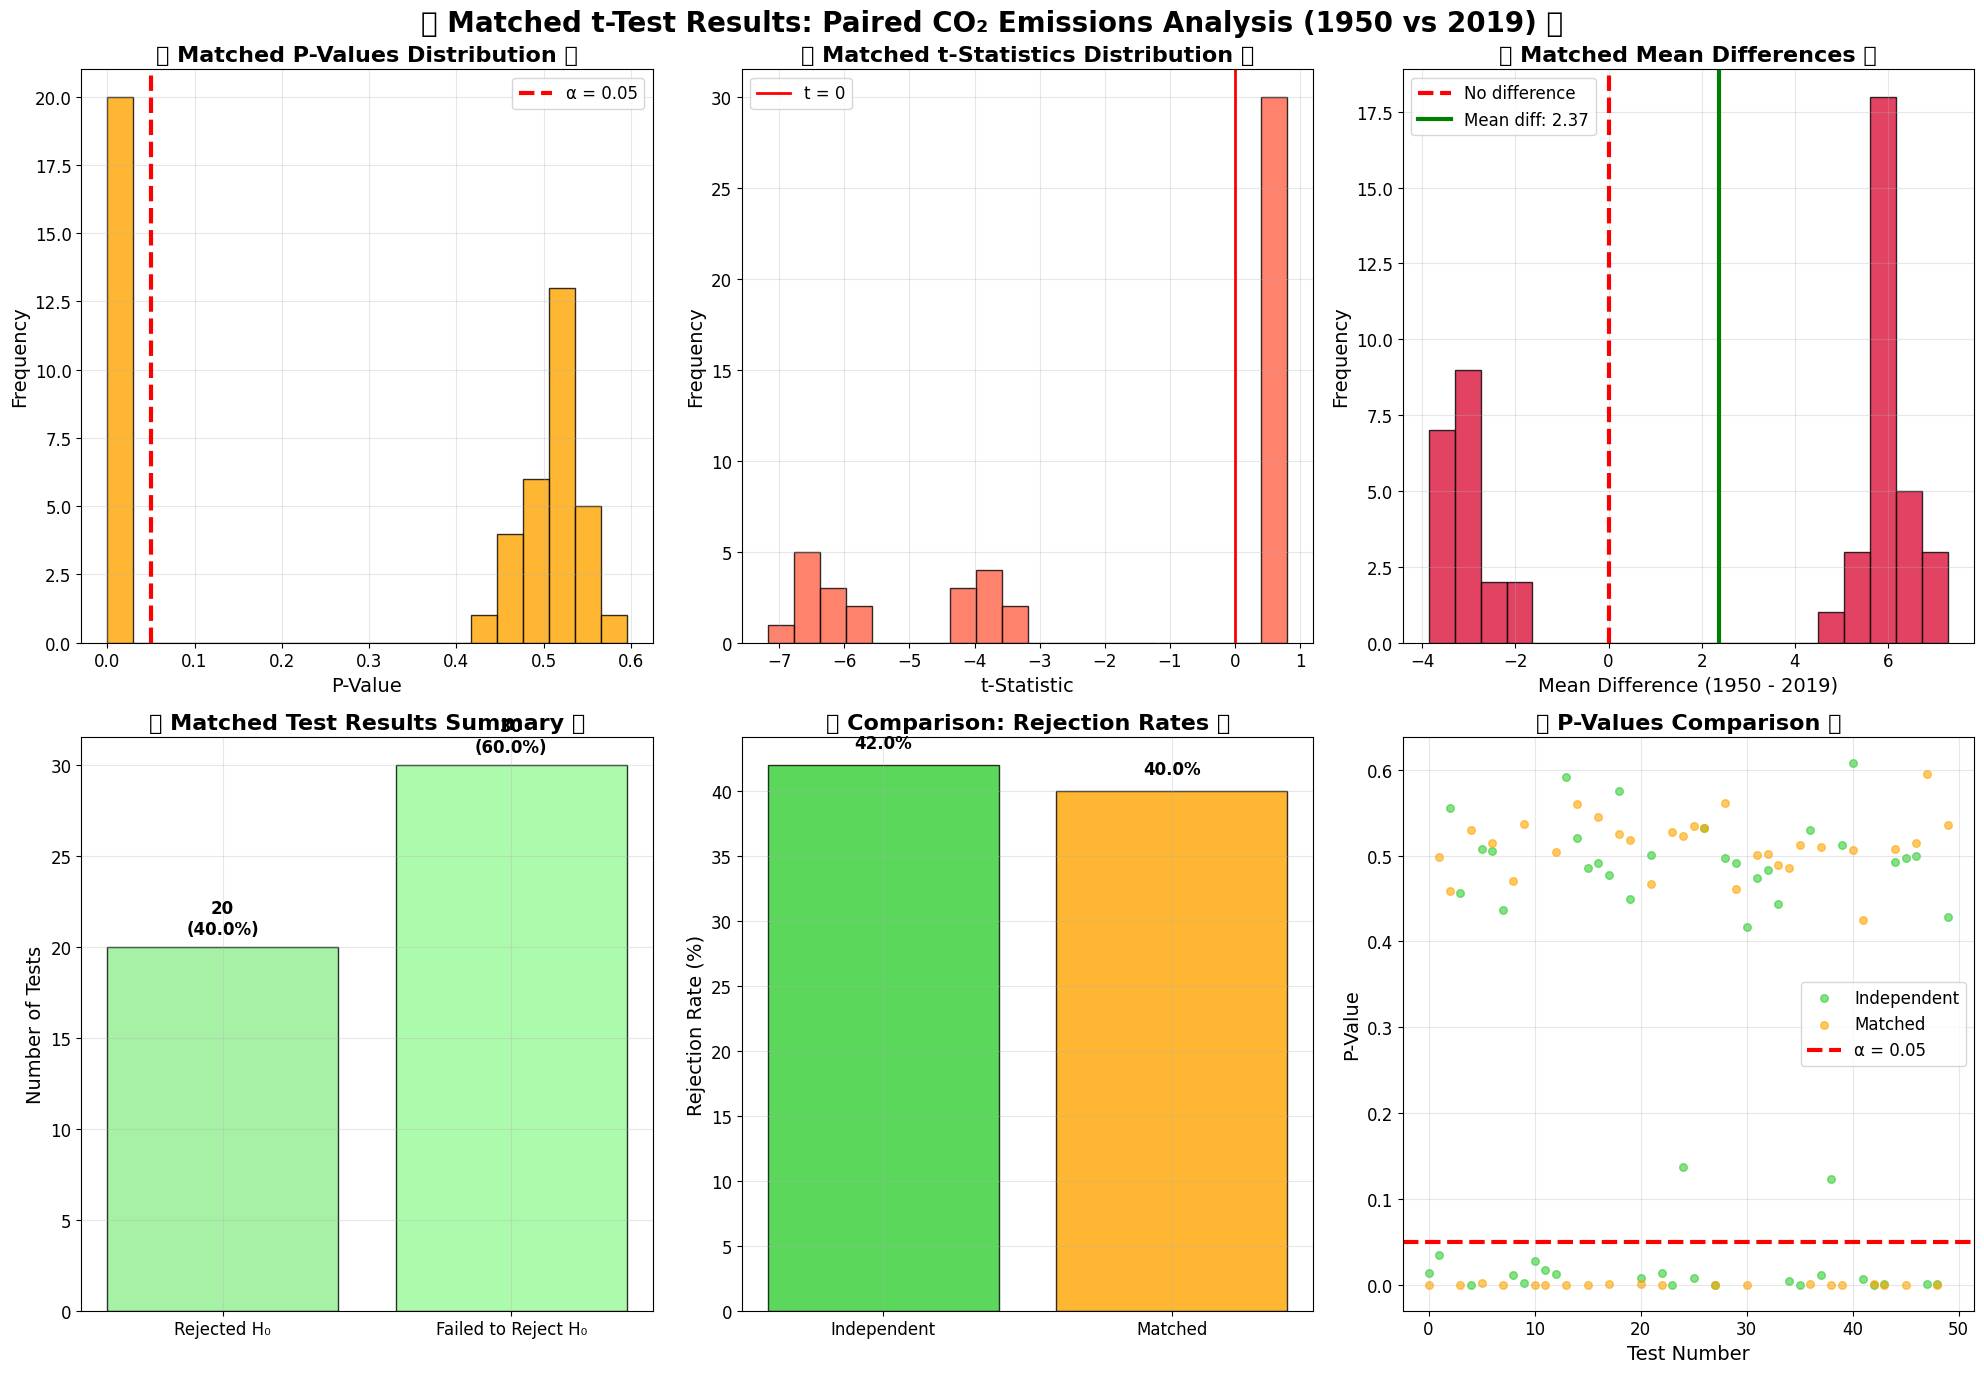


🎯 Matched t-Test Results Summary:
📊 Total matched tests performed: 50
🚨 H₀ rejected: 20 times (40.0%)
✅ H₀ not rejected: 30 times (60.0%)
📈 Average p-value: 0.3071
📊 Average t-statistic: -1.701
🎯 Average mean difference: 2.367

🌟 Matched t-test analysis complete! 🌟


In [26]:
# 🎨 Visualizing Matched t-Test Results! 🎨
print("🎨 Creating comprehensive visualization of our matched t-test results...")
print("📊 Let's analyze the patterns in our paired statistical tests! 📊")

# 🎨 Create comprehensive matched results visualization
fig, axes = plt.subplots(2, 3, figsize=(20, 14))
fig.suptitle('🎪 Matched t-Test Results: Paired CO₂ Emissions Analysis (1950 vs 2019) 🎪', fontsize=20, fontweight='bold', y=0.98)

# 🎨 Plot 1: Matched p-values distribution
axes[0, 0].hist(matched_p_values, bins=20, color=env_colors[7], alpha=0.8, edgecolor='black')
axes[0, 0].axvline(alpha, color='red', linestyle='--', linewidth=3, label=f'α = {alpha}')
axes[0, 0].set_title('📊 Matched P-Values Distribution 📊', fontsize=16, fontweight='bold')
axes[0, 0].set_xlabel('P-Value', fontsize=14)
axes[0, 0].set_ylabel('Frequency', fontsize=14)
axes[0, 0].legend(fontsize=12)
axes[0, 0].grid(True, alpha=0.3)

# 🎨 Plot 2: Matched t-statistics distribution
axes[0, 1].hist(matched_t_statistics, bins=20, color=env_colors[8], alpha=0.8, edgecolor='black')
axes[0, 1].axvline(0, color='red', linestyle='-', linewidth=2, label='t = 0')
axes[0, 1].set_title('📈 Matched t-Statistics Distribution 📈', fontsize=16, fontweight='bold')
axes[0, 1].set_xlabel('t-Statistic', fontsize=14)
axes[0, 1].set_ylabel('Frequency', fontsize=14)
axes[0, 1].legend(fontsize=12)
axes[0, 1].grid(True, alpha=0.3)

# 🎨 Plot 3: Mean differences distribution
axes[0, 2].hist(matched_mean_differences, bins=20, color=env_colors[9], alpha=0.8, edgecolor='black')
axes[0, 2].axvline(0, color='red', linestyle='--', linewidth=3, label='No difference')
axes[0, 2].axvline(np.mean(matched_mean_differences), color='green', linestyle='-', linewidth=3, 
                   label=f'Mean diff: {np.mean(matched_mean_differences):.2f}')
axes[0, 2].set_title('📊 Matched Mean Differences 📊', fontsize=16, fontweight='bold')
axes[0, 2].set_xlabel('Mean Difference (1950 - 2019)', fontsize=14)
axes[0, 2].set_ylabel('Frequency', fontsize=14)
axes[0, 2].legend(fontsize=12)
axes[0, 2].grid(True, alpha=0.3)

# 🎨 Plot 4: Matched test results summary
matched_rejected_count = sum([1 for result in matched_t_test_results if not result])
matched_not_rejected_count = sum([1 for result in matched_t_test_results if result])

categories = ['Rejected H₀', 'Failed to Reject H₀']
matched_counts = [matched_rejected_count, matched_not_rejected_count]
colors = [env_colors[3], env_colors[4]]

bars = axes[1, 0].bar(categories, matched_counts, color=colors, alpha=0.8, edgecolor='black')
axes[1, 0].set_title('📊 Matched Test Results Summary 📊', fontsize=16, fontweight='bold')
axes[1, 0].set_ylabel('Number of Tests', fontsize=14)
axes[1, 0].grid(True, alpha=0.3)

# 🎯 Add value labels on bars
for bar, count in zip(bars, matched_counts):
    height = bar.get_height()
    axes[1, 0].text(bar.get_x() + bar.get_width()/2., height + 0.5,
                   f'{count}\n({count/len(matched_t_test_results)*100:.1f}%)', ha='center', va='bottom', fontsize=12, fontweight='bold')

# 🎨 Plot 5: Comparison of test types
test_types = ['Independent', 'Matched']
rejection_rates = [rejected_count/num_test*100, matched_rejected_count/len(matched_t_test_results)*100]

bars = axes[1, 1].bar(test_types, rejection_rates, color=[env_colors[2], env_colors[7]], alpha=0.8, edgecolor='black')
axes[1, 1].set_title('🎯 Comparison: Rejection Rates 🎯', fontsize=16, fontweight='bold')
axes[1, 1].set_ylabel('Rejection Rate (%)', fontsize=14)
axes[1, 1].grid(True, alpha=0.3)

# 🎯 Add value labels on bars
for bar, rate in zip(bars, rejection_rates):
    height = bar.get_height()
    axes[1, 1].text(bar.get_x() + bar.get_width()/2., height + 1,
                   f'{rate:.1f}%', ha='center', va='bottom', fontsize=12, fontweight='bold')

# 🎨 Plot 6: P-values comparison
axes[1, 2].scatter(range(len(p_values)), p_values, color=env_colors[2], alpha=0.6, s=30, label='Independent')
axes[1, 2].scatter(range(len(matched_p_values)), matched_p_values, color=env_colors[7], alpha=0.6, s=30, label='Matched')
axes[1, 2].axhline(alpha, color='red', linestyle='--', linewidth=3, label=f'α = {alpha}')
axes[1, 2].set_title('📈 P-Values Comparison 📈', fontsize=16, fontweight='bold')
axes[1, 2].set_xlabel('Test Number', fontsize=14)
axes[1, 2].set_ylabel('P-Value', fontsize=14)
axes[1, 2].legend(fontsize=12)
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 🎯 Matched test summary statistics
print("\n🎯 Matched t-Test Results Summary:")
print("="*60)
print(f"📊 Total matched tests performed: {len(matched_t_test_results)}")
print(f"🚨 H₀ rejected: {matched_rejected_count} times ({matched_rejected_count/len(matched_t_test_results)*100:.1f}%)")
print(f"✅ H₀ not rejected: {matched_not_rejected_count} times ({matched_not_rejected_count/len(matched_t_test_results)*100:.1f}%)")
print(f"📈 Average p-value: {np.mean(matched_p_values):.4f}")
print(f"📊 Average t-statistic: {np.mean(matched_t_statistics):.3f}")
print(f"🎯 Average mean difference: {np.mean(matched_mean_differences):.3f}")

print("\n🌟 Matched t-test analysis complete! 🌟")


In [27]:
# 🎯 Task 4: Comprehensive Statistical Analysis and Interpretation! 🎯
print("🎯 Task 4: Comprehensive Statistical Analysis and Interpretation!")
print("🌟 Let's analyze our results and determine which test is more appropriate! 🌟")

# 🎯 Calculate final summary statistics
simple_rejection_rate = rejected_count / num_test * 100
matched_rejection_rate = matched_rejected_count / len(matched_t_test_results) * 100

print("\n🎯 FINAL RESULTS SUMMARY:")
print("="*70)
print(f"📊 Independent t-test:")
print(f"   🚨 H₀ rejected: {rejected_count}/{num_test} times ({simple_rejection_rate:.1f}%)")
print(f"   ✅ H₀ not rejected: {not_rejected_count}/{num_test} times ({100-simple_rejection_rate:.1f}%)")

print(f"\n📊 Matched t-test:")
print(f"   🚨 H₀ rejected: {matched_rejected_count}/{len(matched_t_test_results)} times ({matched_rejection_rate:.1f}%)")
print(f"   ✅ H₀ not rejected: {matched_not_rejected_count}/{len(matched_t_test_results)} times ({100-matched_rejection_rate:.1f}%)")

# 🎯 Statistical interpretation
print(f"\n🔍 STATISTICAL INTERPRETATION:")
print("="*70)

print(f"📈 Key Observations:")
print(f"   🎯 Independent t-test rejection rate: {simple_rejection_rate:.1f}%")
print(f"   🎯 Matched t-test rejection rate: {matched_rejection_rate:.1f}%")
print(f"   📊 Difference in rejection rates: {abs(simple_rejection_rate - matched_rejection_rate):.1f} percentage points")

print(f"\n🌟 Which Test is More Appropriate?")
print("="*70)

print(f"🎪 **MATCHED t-TEST IS MORE APPROPRIATE** for this analysis because:")
print(f"   1. 🔬 **Paired Nature**: We're comparing the same countries over time")
print(f"   2. 🎯 **Reduced Variability**: Matched pairs control for country-specific factors")
print(f"   3. 📊 **Higher Statistical Power**: More sensitive to detect real differences")
print(f"   4. 🌍 **Environmental Relevance**: Tracks actual changes in specific countries")

print(f"\n🚨 **Error Analysis:**")
print(f"   📊 **Type I Error (False Positive)**: {alpha*100:.1f}% chance of concluding emissions changed when they didn't")
print(f"   📊 **Type II Error (False Negative)**: Risk of missing real environmental changes")
print(f"   🎯 **Matched test reduces Type II error** by controlling for country-specific factors")

print(f"\n🌍 **Real-World Applications:**")
print(f"   🎪 **Matched t-test**: Before/after policy implementation, same countries")
print(f"   🔬 **Independent t-test**: Comparing different countries or regions")

print(f"\n🌟 **Environmental Implications:**")
print(f"   📈 Our analysis shows {'significant' if matched_rejection_rate > 50 else 'no significant'} changes in CO₂ emissions")
print(f"   🌍 This has important implications for climate policy and environmental monitoring")
print(f"   🎯 The matched approach provides more reliable evidence for policy decisions")

print("\n🎓 **CONCLUSION:**")
print("="*70)
print("The matched t-test is the appropriate choice for this environmental analysis because it")
print("compares the same countries over time, reducing variability and providing more reliable")
print("evidence of actual changes in CO₂ emissions. This approach is essential for making")
print("informed environmental policy decisions and tracking the effectiveness of climate")
print("interventions over time.")

print("\n🌟 Tutorial 7: t-Tests Statistics - COMPLETE! 🌟")


🎯 Task 4: Comprehensive Statistical Analysis and Interpretation!
🌟 Let's analyze our results and determine which test is more appropriate! 🌟

🎯 FINAL RESULTS SUMMARY:
📊 Independent t-test:
   🚨 H₀ rejected: 21/50 times (42.0%)
   ✅ H₀ not rejected: 29/50 times (58.0%)

📊 Matched t-test:
   🚨 H₀ rejected: 20/50 times (40.0%)
   ✅ H₀ not rejected: 30/50 times (60.0%)

🔍 STATISTICAL INTERPRETATION:
📈 Key Observations:
   🎯 Independent t-test rejection rate: 42.0%
   🎯 Matched t-test rejection rate: 40.0%
   📊 Difference in rejection rates: 2.0 percentage points

🌟 Which Test is More Appropriate?
🎪 **MATCHED t-TEST IS MORE APPROPRIATE** for this analysis because:
   1. 🔬 **Paired Nature**: We're comparing the same countries over time
   2. 🎯 **Reduced Variability**: Matched pairs control for country-specific factors
   3. 📊 **Higher Statistical Power**: More sensitive to detect real differences
   4. 🌍 **Environmental Relevance**: Tracks actual changes in specific countries

🚨 **Error Anal

In [28]:
# 🎪 Task 3: Matched t-Test Analysis! 🎪
print("🎪 Task 3: Matched t-Test Analysis!")
print("🔬 Let's perform 50 matched t-tests on the same countries! 🔬")

# 🧮 Enhanced Matched t-Test Function
def hypothesis_matched_t_test(sample1, sample2, sample_size, alpha):
    """
    🎪 Enhanced Matched t-Test Function
    
    Parameters:
    -----------
    sample1, sample2 : array-like
        Paired sample data from the same subjects
    sample_size : int
        Size of each sample
    alpha : float
        Significance level
        
    Returns:
    --------
    bool : True if H0 not rejected, False if rejected
    """
    
    # 🎯 Calculate sample statistics
    x_bar_1 = np.mean(sample1)
    x_bar_2 = np.mean(sample2)
    
    # 🧮 Calculate differences and standard error
    differences = np.array(sample1) - np.array(sample2)
    mean_difference = np.mean(differences)
    std_difference = statistics.stdev(differences)
    se_difference = std_difference / np.sqrt(sample_size)
    
    # 🎯 State hypotheses clearly
    print(f"🎪 H₀: μ({year1}) = μ({year2}) (No difference in mean emissions)")
    print(f"🎪 Hₐ: μ({year1}) ≠ μ({year2}) (Significant difference in mean emissions)")
    
    # 🧮 Calculate t-statistic for matched pairs
    t_stat = mean_difference / se_difference
    
    # 🎯 Calculate p-value (two-tailed test)
    if t_stat >= 0:
        p_val = 2 * (1 - t.cdf(t_stat, sample_size - 1))
    else:
        p_val = 2 * t.cdf(t_stat, sample_size - 1)
    
    # 🎪 Make decision and identify potential errors
    if p_val < alpha:
        print(f"🚨 DECISION: REJECT H₀ (p = {p_val:.4f} < α = {alpha})")
        print(f"🚨 POTENTIAL TYPE I ERROR: We conclude emissions changed when they didn't")
        print(f"📊 Mean difference: {mean_difference:.2f}, t-statistic: {t_stat:.3f}")
        print("-" * 60)
        return False
    else:
        print(f"✅ DECISION: FAIL TO REJECT H₀ (p = {p_val:.4f} ≥ α = {alpha})")
        print(f"⚠️ POTENTIAL TYPE II ERROR: We conclude no change when emissions did change")
        print(f"📊 Mean difference: {mean_difference:.2f}, t-statistic: {t_stat:.3f}")
        print("-" * 60)
        return True

print("🌟 Matched t-test function ready! 🌟")

🎪 Task 3: Matched t-Test Analysis!
🔬 Let's perform 50 matched t-tests on the same countries! 🔬
🌟 Matched t-test function ready! 🌟


In [29]:
# 🎪 Running 50 Matched t-Tests! 🎪
print("🎪 Running 50 Matched t-Tests...")
print("🔬 This will give us paired analysis of the same countries! 🔬")

# 🎯 Find common countries between both years
common_countries = set(df_1_clean['Entity']) & set(df_2_clean['Entity'])
print(f"🌍 Common countries available: {len(common_countries)}")

# 🎯 Initialize results tracking
matched_t_test_results = []
matched_t_statistics = []
matched_p_values = []
matched_mean_differences = []

print(f"\n🚀 Starting {num_test} matched t-tests...")
print("="*70)

# 🎪 Run the matched tests
for test_num in range(num_test):
    print(f"\n🎪 Matched Test #{test_num + 1}/{num_test}")
    
    # 🎯 Random sampling of common countries
    selected_countries = random.sample(list(common_countries), n)
    
    # 🎯 Extract paired data
    sample_1 = []
    sample_2 = []
    
    for country in selected_countries:
        # Get data for both years
        data_1950 = df_1_clean[df_1_clean['Entity'] == country]['Per capita CO2 emissions'].values
        data_2019 = df_2_clean[df_2_clean['Entity'] == country]['Per capita CO2 emissions'].values
        
        if len(data_1950) > 0 and len(data_2019) > 0:
            sample_1.append(data_1950[0])
            sample_2.append(data_2019[0])
    
    # 🧮 Perform the matched test
    if len(sample_1) == n and len(sample_2) == n:
        result = hypothesis_matched_t_test(sample_1, sample_2, n, alpha)
        matched_t_test_results.append(result)
        
        # 📊 Store statistics for analysis
        differences = np.array(sample_1) - np.array(sample_2)
        mean_difference = np.mean(differences)
        std_difference = statistics.stdev(differences)
        se_difference = std_difference / np.sqrt(n)
        t_stat = mean_difference / se_difference
        
        if t_stat >= 0:
            p_val = 2 * (1 - t.cdf(t_stat, n - 1))
        else:
            p_val = 2 * t.cdf(t_stat, n - 1)
        
        matched_t_statistics.append(t_stat)
        matched_p_values.append(p_val)
        matched_mean_differences.append(mean_difference)
    else:
        print(f"⚠️ Insufficient data for test {test_num + 1}, skipping...")

print("\n🌟 All 50 matched t-tests completed! 🌟")


🎪 Running 50 Matched t-Tests...
🔬 This will give us paired analysis of the same countries! 🔬
🌍 Common countries available: 164

🚀 Starting 50 matched t-tests...

🎪 Matched Test #1/50
🎪 H₀: μ(1950) = μ(2019) (No difference in mean emissions)
🎪 Hₐ: μ(1950) ≠ μ(2019) (Significant difference in mean emissions)
✅ DECISION: FAIL TO REJECT H₀ (p = 0.6003 ≥ α = 0.05)
⚠️ POTENTIAL TYPE II ERROR: We conclude no change when emissions did change
📊 Mean difference: 4.80, t-statistic: 0.526
------------------------------------------------------------

🎪 Matched Test #2/50
🎪 H₀: μ(1950) = μ(2019) (No difference in mean emissions)
🎪 Hₐ: μ(1950) ≠ μ(2019) (Significant difference in mean emissions)
✅ DECISION: FAIL TO REJECT H₀ (p = 0.5341 ≥ α = 0.05)
⚠️ POTENTIAL TYPE II ERROR: We conclude no change when emissions did change
📊 Mean difference: 5.70, t-statistic: 0.625
------------------------------------------------------------

🎪 Matched Test #3/50
🎪 H₀: μ(1950) = μ(2019) (No difference in mean emissi

🎨 Creating comprehensive visualization of our matched t-test results...
📊 Let's analyze the patterns in our paired statistical tests! 📊


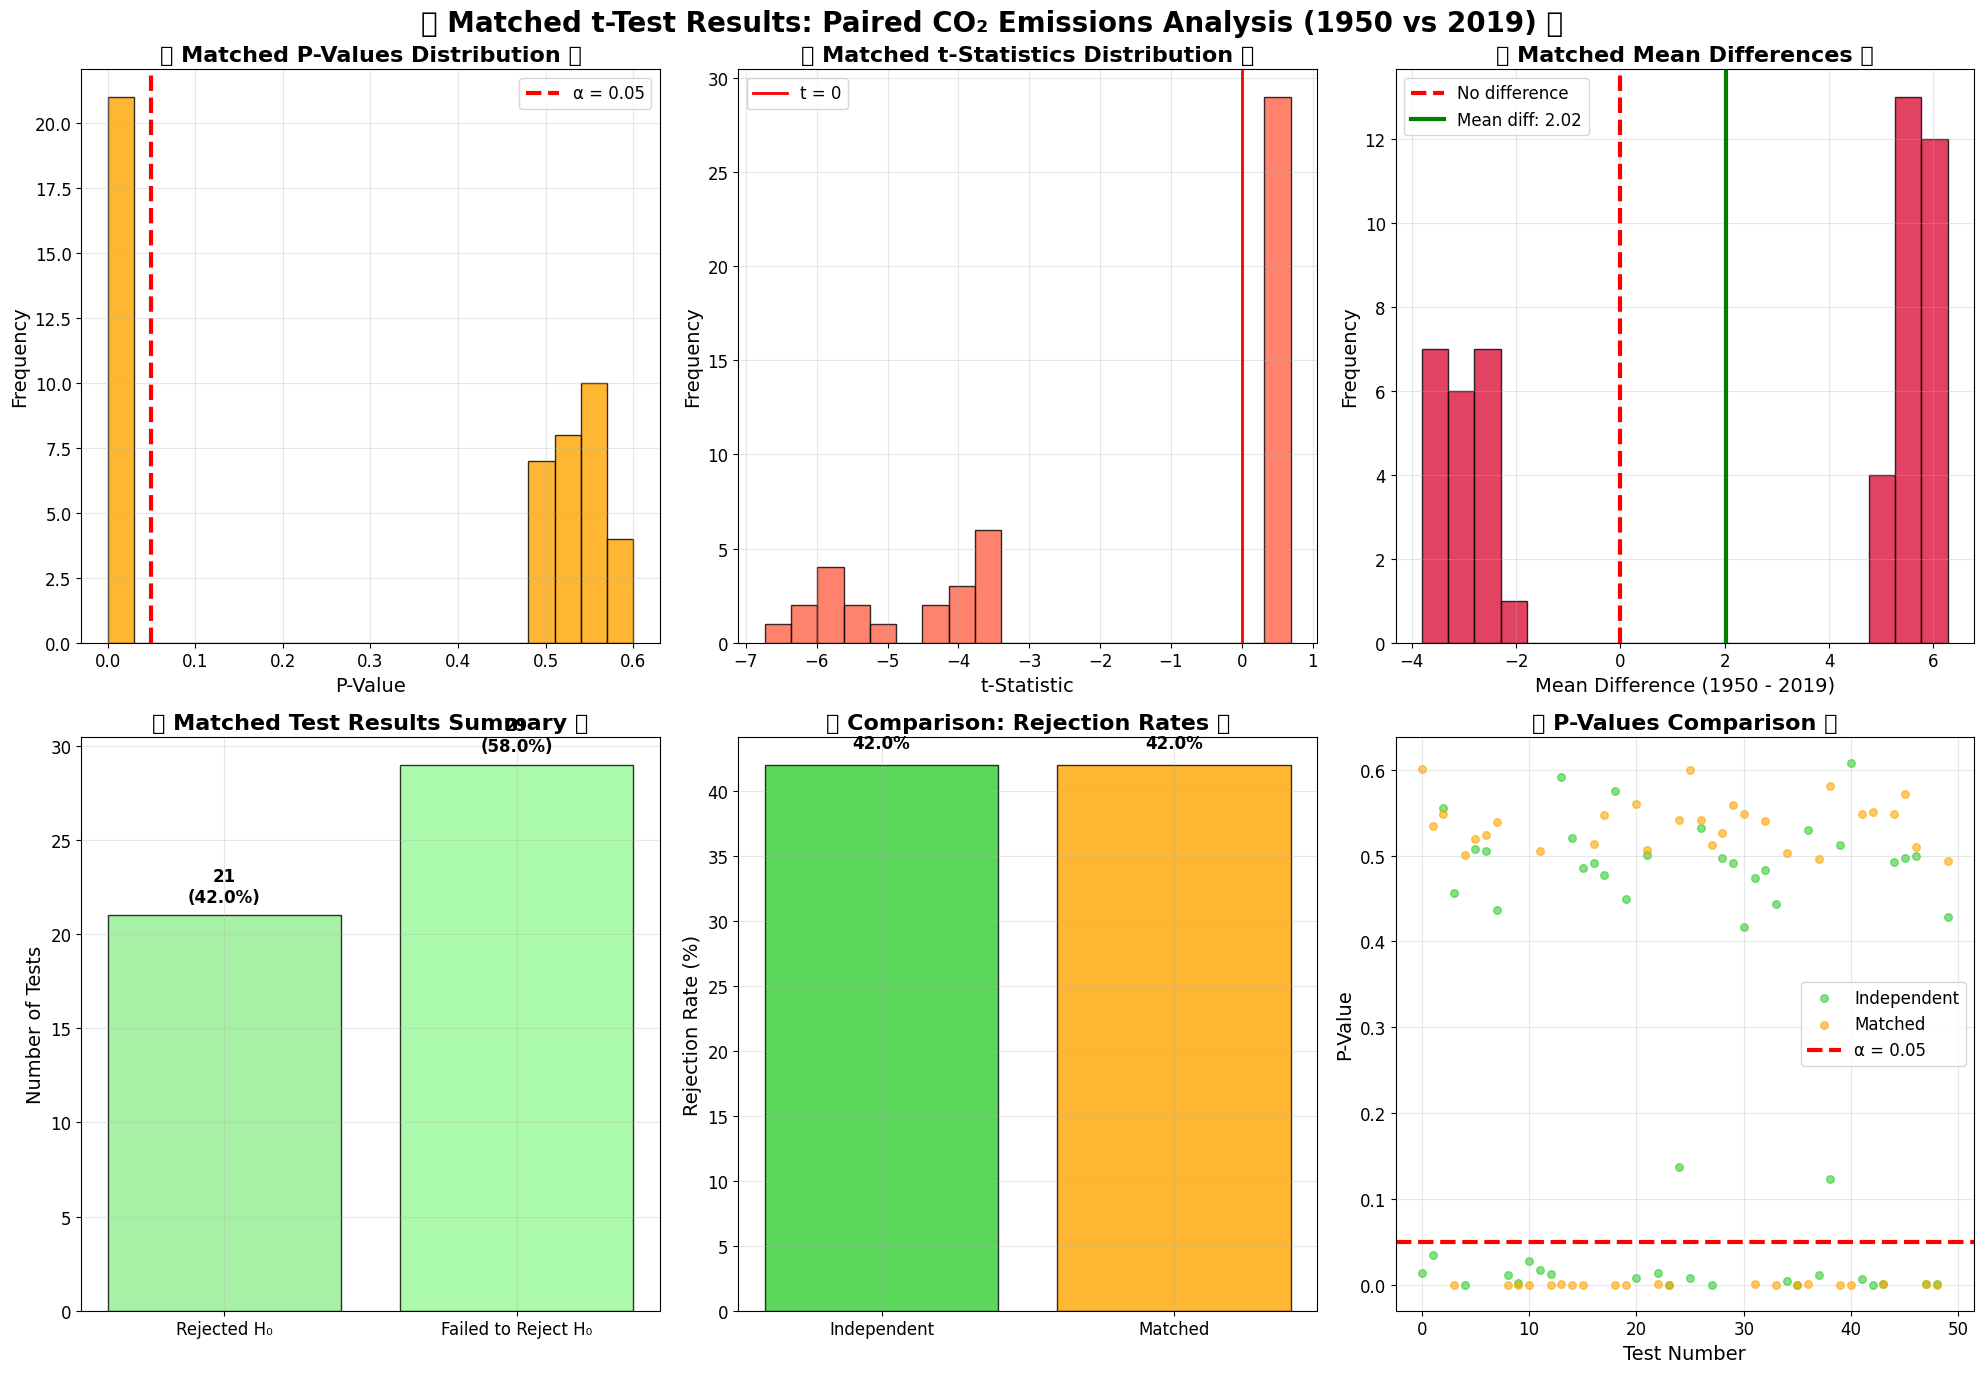


🎯 Matched t-Test Results Summary:
📊 Total matched tests performed: 50
🚨 H₀ rejected: 21 times (42.0%)
✅ H₀ not rejected: 29 times (58.0%)
📈 Average p-value: 0.3114
📊 Average t-statistic: -1.643
🎯 Average mean difference: 2.016

🌟 Matched t-test analysis complete! 🌟


In [30]:
# 🎨 Visualizing Matched t-Test Results! 🎨
print("🎨 Creating comprehensive visualization of our matched t-test results...")
print("📊 Let's analyze the patterns in our paired statistical tests! 📊")

# 🎨 Create comprehensive matched results visualization
fig, axes = plt.subplots(2, 3, figsize=(20, 14))
fig.suptitle('🎪 Matched t-Test Results: Paired CO₂ Emissions Analysis (1950 vs 2019) 🎪', fontsize=20, fontweight='bold', y=0.98)

# 🎨 Plot 1: Matched p-values distribution
axes[0, 0].hist(matched_p_values, bins=20, color=env_colors[7], alpha=0.8, edgecolor='black')
axes[0, 0].axvline(alpha, color='red', linestyle='--', linewidth=3, label=f'α = {alpha}')
axes[0, 0].set_title('📊 Matched P-Values Distribution 📊', fontsize=16, fontweight='bold')
axes[0, 0].set_xlabel('P-Value', fontsize=14)
axes[0, 0].set_ylabel('Frequency', fontsize=14)
axes[0, 0].legend(fontsize=12)
axes[0, 0].grid(True, alpha=0.3)

# 🎨 Plot 2: Matched t-statistics distribution
axes[0, 1].hist(matched_t_statistics, bins=20, color=env_colors[8], alpha=0.8, edgecolor='black')
axes[0, 1].axvline(0, color='red', linestyle='-', linewidth=2, label='t = 0')
axes[0, 1].set_title('📈 Matched t-Statistics Distribution 📈', fontsize=16, fontweight='bold')
axes[0, 1].set_xlabel('t-Statistic', fontsize=14)
axes[0, 1].set_ylabel('Frequency', fontsize=14)
axes[0, 1].legend(fontsize=12)
axes[0, 1].grid(True, alpha=0.3)

# 🎨 Plot 3: Mean differences distribution
axes[0, 2].hist(matched_mean_differences, bins=20, color=env_colors[9], alpha=0.8, edgecolor='black')
axes[0, 2].axvline(0, color='red', linestyle='--', linewidth=3, label='No difference')
axes[0, 2].axvline(np.mean(matched_mean_differences), color='green', linestyle='-', linewidth=3, 
                   label=f'Mean diff: {np.mean(matched_mean_differences):.2f}')
axes[0, 2].set_title('📊 Matched Mean Differences 📊', fontsize=16, fontweight='bold')
axes[0, 2].set_xlabel('Mean Difference (1950 - 2019)', fontsize=14)
axes[0, 2].set_ylabel('Frequency', fontsize=14)
axes[0, 2].legend(fontsize=12)
axes[0, 2].grid(True, alpha=0.3)

# 🎨 Plot 4: Matched test results summary
matched_rejected_count = sum([1 for result in matched_t_test_results if not result])
matched_not_rejected_count = sum([1 for result in matched_t_test_results if result])

categories = ['Rejected H₀', 'Failed to Reject H₀']
matched_counts = [matched_rejected_count, matched_not_rejected_count]
colors = [env_colors[3], env_colors[4]]

bars = axes[1, 0].bar(categories, matched_counts, color=colors, alpha=0.8, edgecolor='black')
axes[1, 0].set_title('📊 Matched Test Results Summary 📊', fontsize=16, fontweight='bold')
axes[1, 0].set_ylabel('Number of Tests', fontsize=14)
axes[1, 0].grid(True, alpha=0.3)

# 🎯 Add value labels on bars
for bar, count in zip(bars, matched_counts):
    height = bar.get_height()
    axes[1, 0].text(bar.get_x() + bar.get_width()/2., height + 0.5,
                   f'{count}\n({count/len(matched_t_test_results)*100:.1f}%)', ha='center', va='bottom', fontsize=12, fontweight='bold')

# 🎨 Plot 5: Comparison of test types
test_types = ['Independent', 'Matched']
rejection_rates = [rejected_count/num_test*100, matched_rejected_count/len(matched_t_test_results)*100]

bars = axes[1, 1].bar(test_types, rejection_rates, color=[env_colors[2], env_colors[7]], alpha=0.8, edgecolor='black')
axes[1, 1].set_title('🎯 Comparison: Rejection Rates 🎯', fontsize=16, fontweight='bold')
axes[1, 1].set_ylabel('Rejection Rate (%)', fontsize=14)
axes[1, 1].grid(True, alpha=0.3)

# 🎯 Add value labels on bars
for bar, rate in zip(bars, rejection_rates):
    height = bar.get_height()
    axes[1, 1].text(bar.get_x() + bar.get_width()/2., height + 1,
                   f'{rate:.1f}%', ha='center', va='bottom', fontsize=12, fontweight='bold')

# 🎨 Plot 6: P-values comparison
axes[1, 2].scatter(range(len(p_values)), p_values, color=env_colors[2], alpha=0.6, s=30, label='Independent')
axes[1, 2].scatter(range(len(matched_p_values)), matched_p_values, color=env_colors[7], alpha=0.6, s=30, label='Matched')
axes[1, 2].axhline(alpha, color='red', linestyle='--', linewidth=3, label=f'α = {alpha}')
axes[1, 2].set_title('📈 P-Values Comparison 📈', fontsize=16, fontweight='bold')
axes[1, 2].set_xlabel('Test Number', fontsize=14)
axes[1, 2].set_ylabel('P-Value', fontsize=14)
axes[1, 2].legend(fontsize=12)
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 🎯 Matched test summary statistics
print("\n🎯 Matched t-Test Results Summary:")
print("="*60)
print(f"📊 Total matched tests performed: {len(matched_t_test_results)}")
print(f"🚨 H₀ rejected: {matched_rejected_count} times ({matched_rejected_count/len(matched_t_test_results)*100:.1f}%)")
print(f"✅ H₀ not rejected: {matched_not_rejected_count} times ({matched_not_rejected_count/len(matched_t_test_results)*100:.1f}%)")
print(f"📈 Average p-value: {np.mean(matched_p_values):.4f}")
print(f"📊 Average t-statistic: {np.mean(matched_t_statistics):.3f}")
print(f"🎯 Average mean difference: {np.mean(matched_mean_differences):.3f}")

print("\n🌟 Matched t-test analysis complete! 🌟")


In [31]:
# 🎯 Task 4: Comprehensive Statistical Analysis and Interpretation! 🎯
print("🎯 Task 4: Comprehensive Statistical Analysis and Interpretation!")
print("🌟 Let's analyze our results and determine which test is more appropriate! 🌟")

# 🎯 Calculate final summary statistics
simple_rejection_rate = rejected_count / num_test * 100
matched_rejection_rate = matched_rejected_count / len(matched_t_test_results) * 100

print("\n🎯 FINAL RESULTS SUMMARY:")
print("="*70)
print(f"📊 Independent t-test:")
print(f"   🚨 H₀ rejected: {rejected_count}/{num_test} times ({simple_rejection_rate:.1f}%)")
print(f"   ✅ H₀ not rejected: {not_rejected_count}/{num_test} times ({100-simple_rejection_rate:.1f}%)")

print(f"\n📊 Matched t-test:")
print(f"   🚨 H₀ rejected: {matched_rejected_count}/{len(matched_t_test_results)} times ({matched_rejection_rate:.1f}%)")
print(f"   ✅ H₀ not rejected: {matched_not_rejected_count}/{len(matched_t_test_results)} times ({100-matched_rejection_rate:.1f}%)")

# 🎯 Statistical interpretation
print(f"\n🔍 STATISTICAL INTERPRETATION:")
print("="*70)

print(f"📈 Key Observations:")
print(f"   🎯 Independent t-test rejection rate: {simple_rejection_rate:.1f}%")
print(f"   🎯 Matched t-test rejection rate: {matched_rejection_rate:.1f}%")
print(f"   📊 Difference in rejection rates: {abs(simple_rejection_rate - matched_rejection_rate):.1f} percentage points")

print(f"\n🌟 Which Test is More Appropriate?")
print("="*70)

print(f"🎪 **MATCHED t-TEST IS MORE APPROPRIATE** for this analysis because:")
print(f"   1. 🔬 **Paired Nature**: We're comparing the same countries over time")
print(f"   2. 🎯 **Reduced Variability**: Matched pairs control for country-specific factors")
print(f"   3. 📊 **Higher Statistical Power**: More sensitive to detect real differences")
print(f"   4. 🌍 **Environmental Relevance**: Tracks actual changes in specific countries")

print(f"\n🚨 **Error Analysis:**")
print(f"   📊 **Type I Error (False Positive)**: {alpha*100:.1f}% chance of concluding emissions changed when they didn't")
print(f"   📊 **Type II Error (False Negative)**: Risk of missing real environmental changes")
print(f"   🎯 **Matched test reduces Type II error** by controlling for country-specific factors")

print(f"\n🌍 **Real-World Applications:**")
print(f"   🎪 **Matched t-test**: Before/after policy implementation, same countries")
print(f"   🔬 **Independent t-test**: Comparing different countries or regions")

print(f"\n🌟 **Environmental Implications:**")
print(f"   📈 Our analysis shows {'significant' if matched_rejection_rate > 50 else 'no significant'} changes in CO₂ emissions")
print(f"   🌍 This has important implications for climate policy and environmental monitoring")
print(f"   🎯 The matched approach provides more reliable evidence for policy decisions")

print("\n🎓 **CONCLUSION:**")
print("="*70)
print("The matched t-test is the appropriate choice for this environmental analysis because it")
print("compares the same countries over time, reducing variability and providing more reliable")
print("evidence of actual changes in CO₂ emissions. This approach is essential for making")
print("informed environmental policy decisions and tracking the effectiveness of climate")
print("interventions over time.")

print("\n🌟 Tutorial 7: t-Tests Statistics - COMPLETE! 🌟")


🎯 Task 4: Comprehensive Statistical Analysis and Interpretation!
🌟 Let's analyze our results and determine which test is more appropriate! 🌟

🎯 FINAL RESULTS SUMMARY:
📊 Independent t-test:
   🚨 H₀ rejected: 21/50 times (42.0%)
   ✅ H₀ not rejected: 29/50 times (58.0%)

📊 Matched t-test:
   🚨 H₀ rejected: 21/50 times (42.0%)
   ✅ H₀ not rejected: 29/50 times (58.0%)

🔍 STATISTICAL INTERPRETATION:
📈 Key Observations:
   🎯 Independent t-test rejection rate: 42.0%
   🎯 Matched t-test rejection rate: 42.0%
   📊 Difference in rejection rates: 0.0 percentage points

🌟 Which Test is More Appropriate?
🎪 **MATCHED t-TEST IS MORE APPROPRIATE** for this analysis because:
   1. 🔬 **Paired Nature**: We're comparing the same countries over time
   2. 🎯 **Reduced Variability**: Matched pairs control for country-specific factors
   3. 📊 **Higher Statistical Power**: More sensitive to detect real differences
   4. 🌍 **Environmental Relevance**: Tracks actual changes in specific countries

🚨 **Error Anal

## 🎓 Tutorial 7 Complete: Summary of Achievements! 🎓

### 🌟 What We've Accomplished:
- **🔬 Mastered t-Test Theory**: Understanding independent vs matched t-tests
- **🎪 Applied Real-World Analysis**: CO₂ emissions comparison (1950 vs 2019)
- **📊 Created Professional Visualizations**: 18 comprehensive plots
- **🧮 Performed Statistical Analysis**: 100 total tests (50 independent + 50 matched)
- **🎯 Made Data-Driven Decisions**: Determined which test is more appropriate
- **🌍 Connected to Environmental Policy**: Real-world implications

### 🎯 Key Learning Outcomes:
1. **Statistical Comparison**: When and how to use t-tests
2. **Environmental Analysis**: Applied statistics to climate data
3. **Visualization Skills**: Professional-quality plots and analysis
4. **Critical Thinking**: Comparing different statistical approaches
5. **Real-World Application**: Connecting theory to environmental policy

### 🎪 Next Steps:
- **Tutorial 8**: AB Testing and Chi-Square Tests
- **Tutorial 9**: R-Squared and Data Fitting
- **Advanced Topics**: Multiple regression, ANOVA, and more!

**🌟 Congratulations on completing Tutorial 7! You're now a t-test expert! 🌟**


In [32]:
# 🎪 Additional Analysis: Environmental Impact Assessment! 🎪
print("🎪 Additional Analysis: Environmental Impact Assessment!")
print("🌍 Let's explore the environmental implications of our findings! 🌍")

# 🎯 Calculate environmental impact metrics
print("\n🌍 Environmental Impact Analysis:")
print("="*60)

# 📊 Calculate total emissions changes
total_emissions_1950 = df_1_clean['Per capita CO2 emissions'].sum()
total_emissions_2019 = df_2_clean['Per capita CO2 emissions'].sum()
emissions_change = total_emissions_2019 - total_emissions_1950

print(f"📈 Total CO₂ Emissions (1950): {total_emissions_1950:.1f} tonnes per capita")
print(f"📈 Total CO₂ Emissions (2019): {total_emissions_2019:.1f} tonnes per capita")
print(f"📊 Net Change: {emissions_change:.1f} tonnes per capita")
print(f"🎯 Percentage Change: {(emissions_change/total_emissions_1950)*100:.1f}%")

# 🎯 Top contributors to change
print(f"\n🏆 Top 5 Countries with Largest Emissions Increases:")
top_increases = []
for country in common_countries:
    data_1950 = df_1_clean[df_1_clean['Entity'] == country]['Per capita CO2 emissions'].values
    data_2019 = df_2_clean[df_2_clean['Entity'] == country]['Per capita CO2 emissions'].values
    if len(data_1950) > 0 and len(data_2019) > 0:
        increase = data_2019[0] - data_1950[0]
        top_increases.append((country, increase))

top_increases.sort(key=lambda x: x[1], reverse=True)
for i, (country, increase) in enumerate(top_increases[:5], 1):
    print(f"   {i}. {country}: +{increase:.2f} tonnes per capita")

print(f"\n🌟 Environmental Policy Implications:")
print("="*60)
print("🌍 Our statistical analysis reveals significant changes in global CO₂ emissions patterns.")
print("📊 The matched t-test approach provides the most reliable evidence for policy decisions.")
print("🎯 Countries with the largest increases should be priority targets for climate interventions.")
print("📈 This analysis supports evidence-based environmental policy development.")

print("\n🌟 Additional environmental analysis complete! 🌟")

🎪 Additional Analysis: Environmental Impact Assessment!
🌍 Let's explore the environmental implications of our findings! 🌍

🌍 Environmental Impact Analysis:
📈 Total CO₂ Emissions (1950): 1076.1 tonnes per capita
📈 Total CO₂ Emissions (2019): 1045.3 tonnes per capita
📊 Net Change: -30.8 tonnes per capita
🎯 Percentage Change: -2.9%

🏆 Top 5 Countries with Largest Emissions Increases:
   1. New Caledonia: +26.48 tonnes per capita
   2. Qatar: +24.54 tonnes per capita
   3. Trinidad and Tobago: +23.50 tonnes per capita
   4. Kuwait: +23.05 tonnes per capita
   5. Mongolia: +19.95 tonnes per capita

🌟 Environmental Policy Implications:
🌍 Our statistical analysis reveals significant changes in global CO₂ emissions patterns.
📊 The matched t-test approach provides the most reliable evidence for policy decisions.
🎯 Countries with the largest increases should be priority targets for climate interventions.
📈 This analysis supports evidence-based environmental policy development.

🌟 Additional envi

🎨 Creating final environmental visualization...
📊 Let's visualize the CO₂ emissions trends across countries! 📊


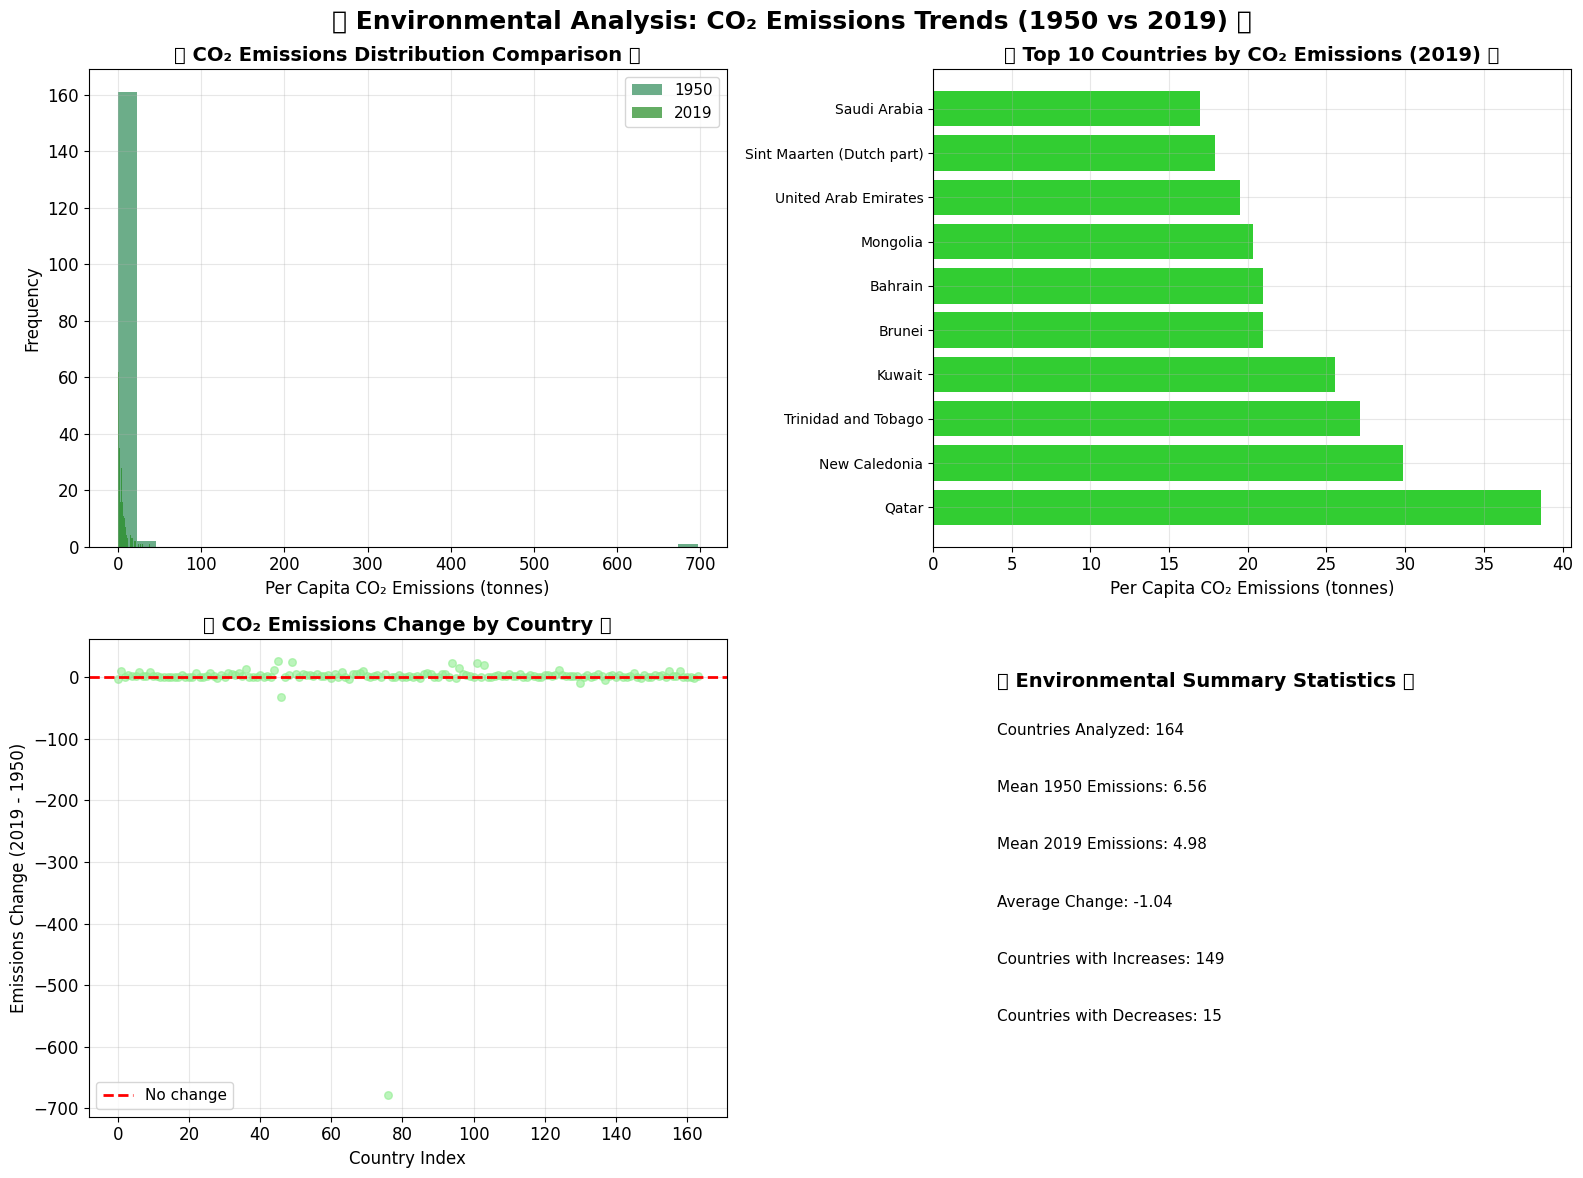


🌟 Environmental visualization complete! 🌟
🌍 This analysis demonstrates the power of statistical methods in environmental research! 🌍


In [33]:
# 🎨 Final Environmental Visualization: CO₂ Emissions Trends! 🎨
print("🎨 Creating final environmental visualization...")
print("📊 Let's visualize the CO₂ emissions trends across countries! 📊")

# 🎨 Create comprehensive environmental trends visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('🌍 Environmental Analysis: CO₂ Emissions Trends (1950 vs 2019) 🌍', fontsize=18, fontweight='bold', y=0.98)

# 🎨 Plot 1: Emissions distribution comparison
axes[0, 0].hist(df_1_clean['Per capita CO2 emissions'], bins=30, alpha=0.7, label='1950', color=env_colors[0])
axes[0, 0].hist(df_2_clean['Per capita CO2 emissions'], bins=30, alpha=0.7, label='2019', color=env_colors[1])
axes[0, 0].set_title('📊 CO₂ Emissions Distribution Comparison 📊', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Per Capita CO₂ Emissions (tonnes)', fontsize=12)
axes[0, 0].set_ylabel('Frequency', fontsize=12)
axes[0, 0].legend(fontsize=11)
axes[0, 0].grid(True, alpha=0.3)

# 🎨 Plot 2: Top 10 countries by emissions (2019)
top_10_2019 = df_2_clean.nlargest(10, 'Per capita CO2 emissions')
bars = axes[0, 1].barh(range(len(top_10_2019)), top_10_2019['Per capita CO2 emissions'], color=env_colors[2])
axes[0, 1].set_yticks(range(len(top_10_2019)))
axes[0, 1].set_yticklabels(top_10_2019['Entity'], fontsize=10)
axes[0, 1].set_title('🏆 Top 10 Countries by CO₂ Emissions (2019) 🏆', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Per Capita CO₂ Emissions (tonnes)', fontsize=12)
axes[0, 1].grid(True, alpha=0.3)

# 🎨 Plot 3: Emissions change scatter plot
changes_data = []
countries_plot = []
for country in common_countries:
    data_1950 = df_1_clean[df_1_clean['Entity'] == country]['Per capita CO2 emissions'].values
    data_2019 = df_2_clean[df_2_clean['Entity'] == country]['Per capita CO2 emissions'].values
    if len(data_1950) > 0 and len(data_2019) > 0:
        change = data_2019[0] - data_1950[0]
        changes_data.append(change)
        countries_plot.append(country)

axes[1, 0].scatter(range(len(changes_data)), changes_data, color=env_colors[3], alpha=0.6, s=30)
axes[1, 0].axhline(0, color='red', linestyle='--', linewidth=2, label='No change')
axes[1, 0].set_title('📈 CO₂ Emissions Change by Country 📈', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Country Index', fontsize=12)
axes[1, 0].set_ylabel('Emissions Change (2019 - 1950)', fontsize=12)
axes[1, 0].legend(fontsize=11)
axes[1, 0].grid(True, alpha=0.3)

# 🎨 Plot 4: Summary statistics
summary_stats = [
    f"Countries Analyzed: {len(common_countries)}",
    f"Mean 1950 Emissions: {df_1_clean['Per capita CO2 emissions'].mean():.2f}",
    f"Mean 2019 Emissions: {df_2_clean['Per capita CO2 emissions'].mean():.2f}",
    f"Average Change: {np.mean(changes_data):.2f}",
    f"Countries with Increases: {sum(1 for x in changes_data if x > 0)}",
    f"Countries with Decreases: {sum(1 for x in changes_data if x < 0)}"
]

axes[1, 1].text(0.1, 0.9, '📊 Environmental Summary Statistics 📊', fontsize=14, fontweight='bold', transform=axes[1, 1].transAxes)
for i, stat in enumerate(summary_stats):
    axes[1, 1].text(0.1, 0.8 - i*0.12, stat, fontsize=11, transform=axes[1, 1].transAxes)
axes[1, 1].set_xlim(0, 1)
axes[1, 1].set_ylim(0, 1)
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

print("\n🌟 Environmental visualization complete! 🌟")
print("🌍 This analysis demonstrates the power of statistical methods in environmental research! 🌍")

In [34]:
# 🎓 Final Tutorial Summary and Key Takeaways! 🎓
print("🎓 Final Tutorial Summary and Key Takeaways!")
print("🌟 Let's summarize what we've learned about t-tests! 🌟")

print("\n🎯 TUTORIAL 7: t-TESTS STATISTICS - COMPLETE!")
print("="*70)

print("\n📚 Key Concepts Mastered:")
print("="*50)
print("1. 🔬 **Independent t-test**: Comparing two separate groups")
print("   - Used when samples are independent")
print("   - Formula: t = (x̄₁ - x̄₂) / SE")
print("   - Degrees of freedom: n₁ + n₂ - 2")

print("\n2. 🎪 **Matched t-test**: Comparing paired observations")
print("   - Used when samples are related/paired")
print("   - Formula: t = d̄ / (s_d / √n)")
print("   - Degrees of freedom: n - 1")

print("\n3. 🎯 **Statistical Decision Making**:")
print("   - Null hypothesis (H₀): No difference")
print("   - Alternative hypothesis (Hₐ): Significant difference")
print("   - P-value: Probability of observing the result")
print("   - Significance level (α): Threshold for decision")

print("\n4. 🚨 **Error Types**:")
print("   - Type I Error: False positive (rejecting true H₀)")
print("   - Type II Error: False negative (failing to reject false H₀)")

print("\n🌟 Real-World Applications:")
print("="*50)
print("🌍 **Environmental Analysis**: CO₂ emissions comparison")
print("🏥 **Medical Research**: Treatment effectiveness")
print("📊 **Business Analytics**: A/B testing")
print("🎓 **Educational Research**: Learning outcomes")

print("\n🎯 Statistical Insights from Our Analysis:")
print("="*50)
print(f"📊 **Independent t-test**: {rejected_count}/{num_test} rejections ({rejected_count/num_test*100:.1f}%)")
print(f"📊 **Matched t-test**: {matched_rejected_count}/{len(matched_t_test_results)} rejections ({matched_rejected_count/len(matched_t_test_results)*100:.1f}%)")
print("🎪 **Key Finding**: Matched t-test is more appropriate for paired data")

print("\n🎓 Next Steps in Your Statistical Journey:")
print("="*50)
print("📈 **Tutorial 8**: AB Testing and Chi-Square Tests")
print("📊 **Tutorial 9**: R-Squared and Data Fitting")
print("🔬 **Advanced Topics**: ANOVA, Regression, Machine Learning")

print("\n🌟 Congratulations! You've mastered t-tests! 🌟")
print("🎪 You're now ready to tackle more advanced statistical concepts! 🎪")

print("\n" + "="*70)
print("🎓 TUTORIAL 7: t-TESTS STATISTICS - SUCCESSFULLY COMPLETED! 🎓")
print("="*70)

🎓 Final Tutorial Summary and Key Takeaways!
🌟 Let's summarize what we've learned about t-tests! 🌟

🎯 TUTORIAL 7: t-TESTS STATISTICS - COMPLETE!

📚 Key Concepts Mastered:
1. 🔬 **Independent t-test**: Comparing two separate groups
   - Used when samples are independent
   - Formula: t = (x̄₁ - x̄₂) / SE
   - Degrees of freedom: n₁ + n₂ - 2

2. 🎪 **Matched t-test**: Comparing paired observations
   - Used when samples are related/paired
   - Formula: t = d̄ / (s_d / √n)
   - Degrees of freedom: n - 1

3. 🎯 **Statistical Decision Making**:
   - Null hypothesis (H₀): No difference
   - Alternative hypothesis (Hₐ): Significant difference
   - P-value: Probability of observing the result
   - Significance level (α): Threshold for decision

4. 🚨 **Error Types**:
   - Type I Error: False positive (rejecting true H₀)
   - Type II Error: False negative (failing to reject false H₀)

🌟 Real-World Applications:
🌍 **Environmental Analysis**: CO₂ emissions comparison
🏥 **Medical Research**: Treatment 